# Advanced Regression
## House Price Prediction - Assignment Solution
### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

Essentially, the company wants to know —

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
### So interpretation is important!

The solution is divided into the following sections: 

- Step 1: Reading and Understanding the Data
- Step 2: Missing Value Treatment
- Step 3: Data Visualisation
- Step 4: Data Preparation
      - Splitting the data into Train and Test Sets
      - Feature Scaling
- Step 5: Building Model
       - Dividing into X and Y sets for the model building
       - Apply Lasso Regression
       - Apply Ridge Regression
- Step 6: Model Evaluation
       - Check Lasso Model Evaluation
       - Check Ridge Model Evaluation


## 1. Reading and Understanding the Data
Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [904]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [905]:
## Importing required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [906]:
# Reading the dataset
House = pd.read_csv("train.csv")
# To view the first five rows
House.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [907]:
# number of rows and columns in the dataset
House.shape

(1460, 81)

In [908]:
# Understanding column names in the dataset
House.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [909]:
# Summary of the dataset: 1460 rows, 81 columns
print(House.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [910]:
# insights of the columns
House.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- The dataset has 81 columns and 1460 rows
- Sale Price is the target variable.
- Few columns can be dropped which are not meaningful. e.g. Id
- Below columns has NA values but as per data dictionary NA means some attribute of the house which is not available. Hence, we   can replace these values with "None". "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",         "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"

In [911]:
# checking the percentage of null values
House_null = House.isnull().mean().round(4) * 100
House_null.sort_values(ascending=False).head(23)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
dtype: float64

## 2. Missing Value Treatment

In [912]:
# Droping these columns having more nulls
House.drop(['Fence','Alley','PoolQC','MiscFeature'],axis=1,inplace = True)
House.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


The following categorical columns have one level NA as i mentioned above

- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement,FireplaceQu : NA = No Fireplace,GarageType,     GarageFinish, GarageQual, GarageCond : NA = No Garage,MasVnrType : NA
1.According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price.
2.Hence, we will first impute the categorical variables with 'None'


In [913]:
NA_with_None = ["MasVnrType", 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in NA_with_None:
    House[i].fillna("none", inplace=True)
House.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [914]:
## Convert three columns to 'object' type based on the Data Dictionary
House[['MSSubClass', 'OverallQual', 'OverallCond']] = House[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [915]:
#Calculate missing value %
total = House.isnull().sum().sort_values(ascending=False)
pct = (House.isnull().sum()/len(House)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(5)

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
BedroomAbvGr,0,0.000000


- LotFrontage has lot of null values hence we impute with median.
- GarageYrBlt, MasVnrArea also have null values.
- We can fill null values with median GarageYrBlt and MasVnrArea.
- Electrical has only one row as NA hence we can delete this row.

In [916]:
# These columns are imputed with median
House['LotFrontage'].fillna(House["LotFrontage"].median(), inplace=True) 
House["GarageYrBlt"].fillna(House["GarageYrBlt"].median(), inplace=True)
House["MasVnrArea"].fillna(House["MasVnrArea"].median(), inplace=True)
House.dropna(inplace = True)

In [917]:
#Calculate missing value %
total = House.isnull().sum().sort_values(ascending=False)
pct = (House.isnull().sum()/len(House)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(5)

,Total,Percent
Id,0,0.0
HalfBath,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0


- All missing values have been imputed successully.

In [918]:
#checking for duplicates, no duplicate records found
House[House.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Data Visualisation

- Visualising the numerical variables
- Observe multicolinearity
- Identify if some predictors directly have a strong association with the outcome variable Visualising the categorical        variables.


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

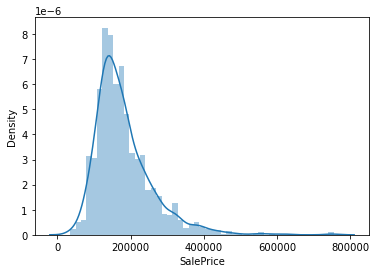

In [919]:
#Visualise the target variable
sns.distplot(House.SalePrice)

- Saleprice data is skewed.

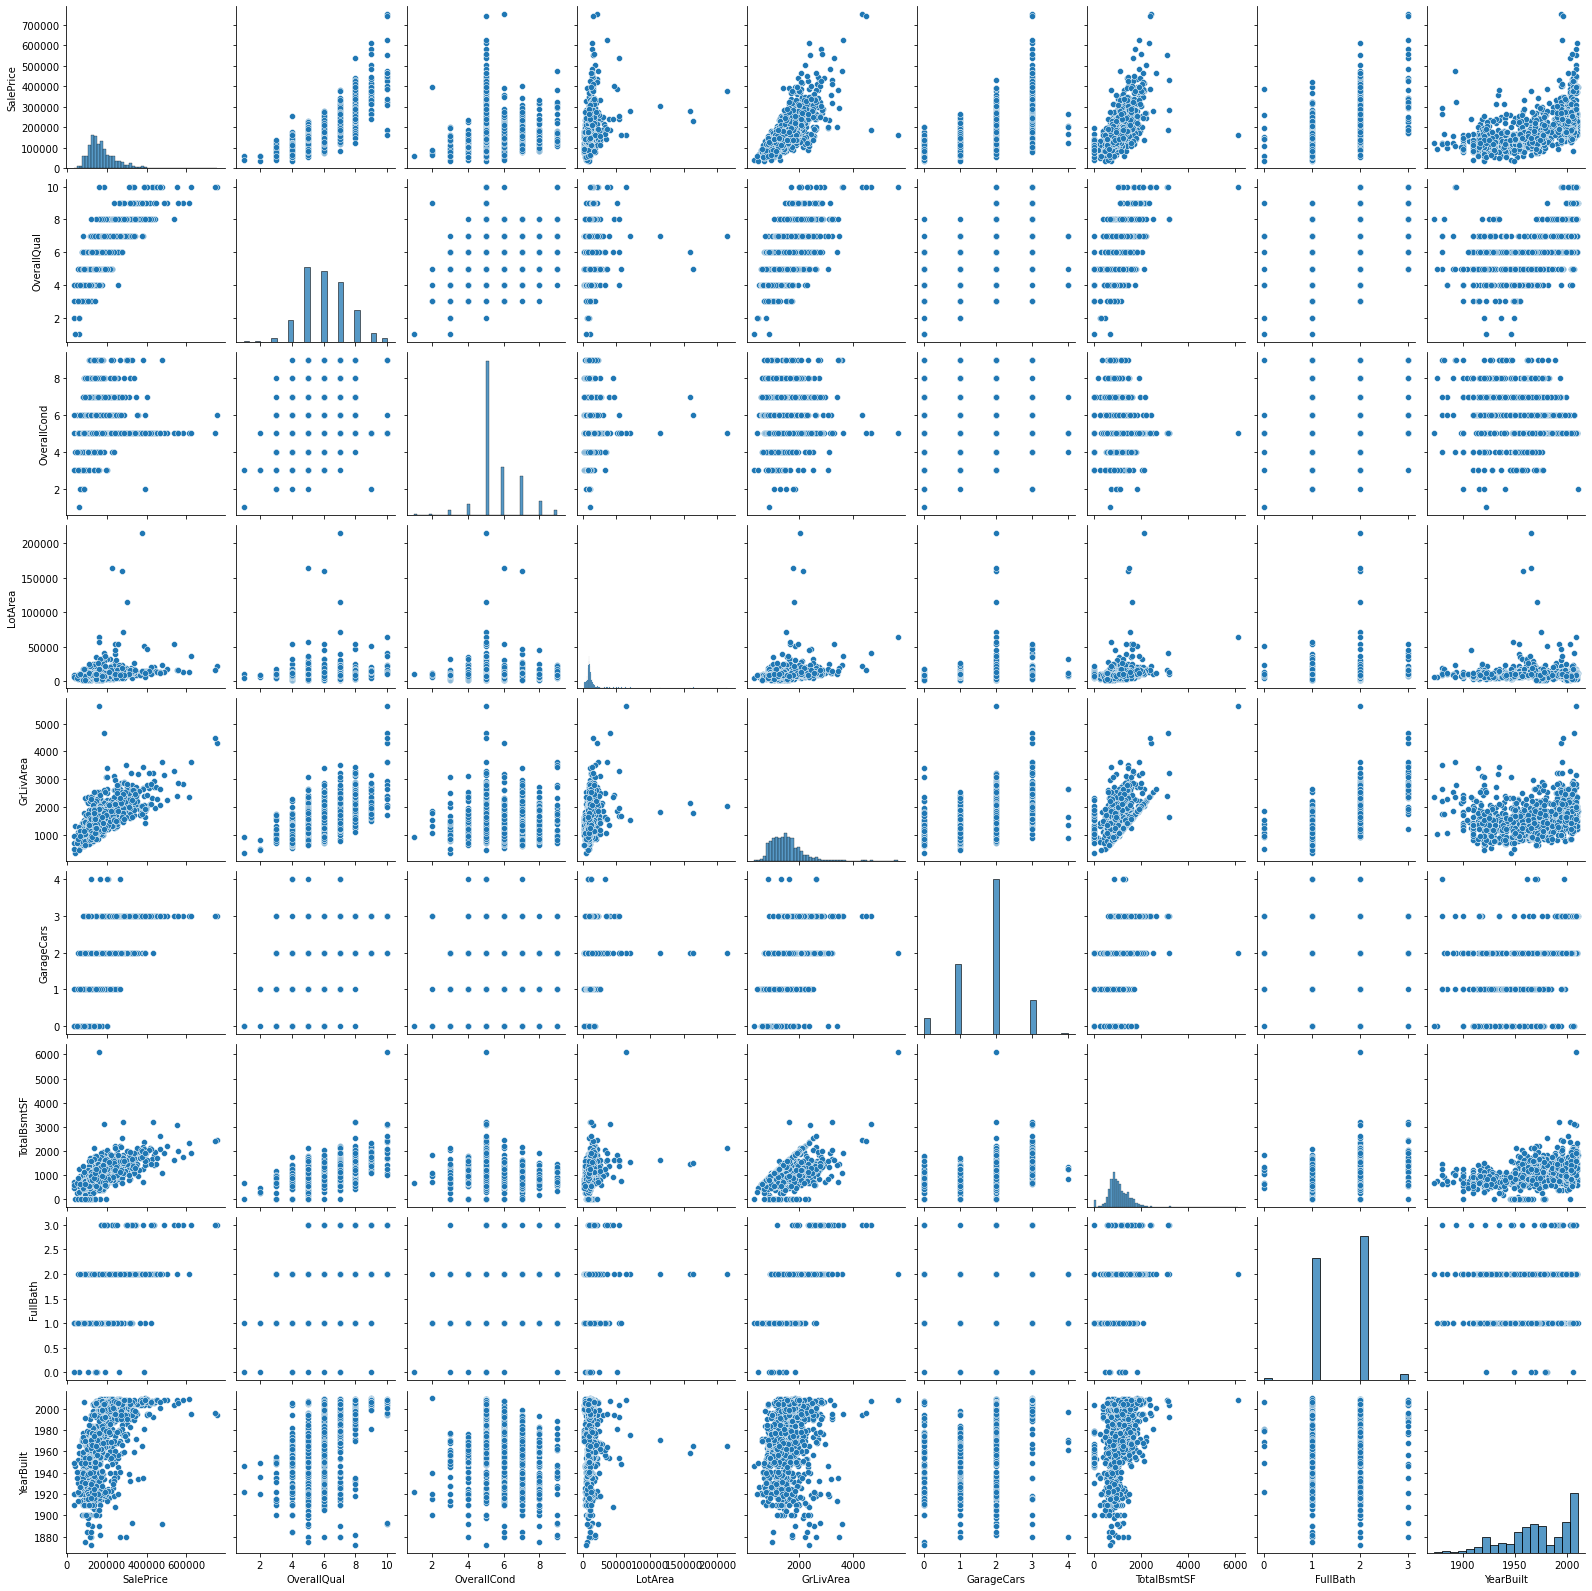

In [920]:
#Visualising the some numerical variables to know the correlation of those columns
House_num = House[['SalePrice', 'OverallQual', 'OverallCond','LotArea','GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
sns.pairplot(House_num)
plt.show()

- SalePrice and TotalBsmtSF shows linear relationship
- SalePrice and GrLivArea shows linear relationship


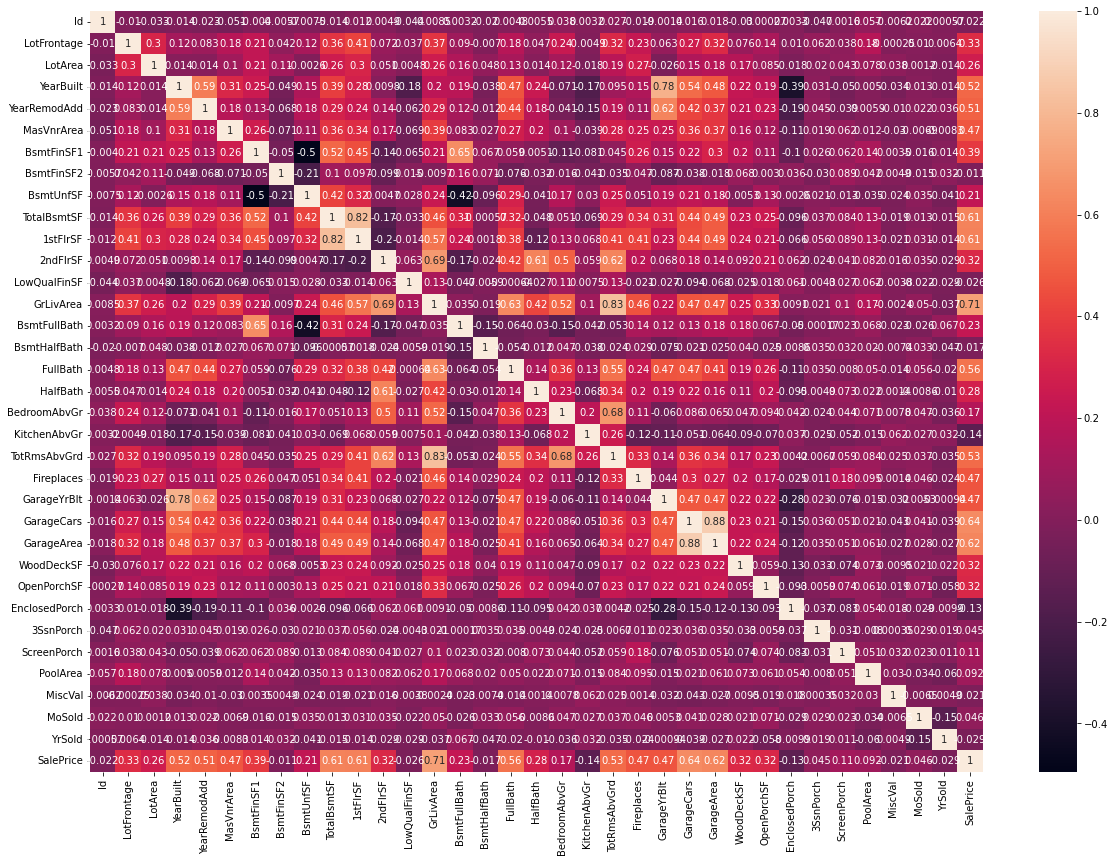

In [921]:
#Plot correlations on heatmap
plt.figure(figsize=(20,14))
sns.heatmap(House.corr(), annot=True)
plt.show()

The heatmap shows some useful insights:

- YearBuilt and GarageYrBlt are highly collinear hence one of them can be dropped.

Correlation of SalePrice with independent variables:

- SalePrice is highly (positively) correlated with TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars, GarageArea. Hence these can be good predictors.

- Saleprice is negatively correlated with KitchenAbvGr and EncosedPorch. So these also can also be good predictors.

In [922]:
#Drop Id and GarageYrBlt column
House.drop(["Id", "GarageYrBlt"],  axis=1, inplace=True)

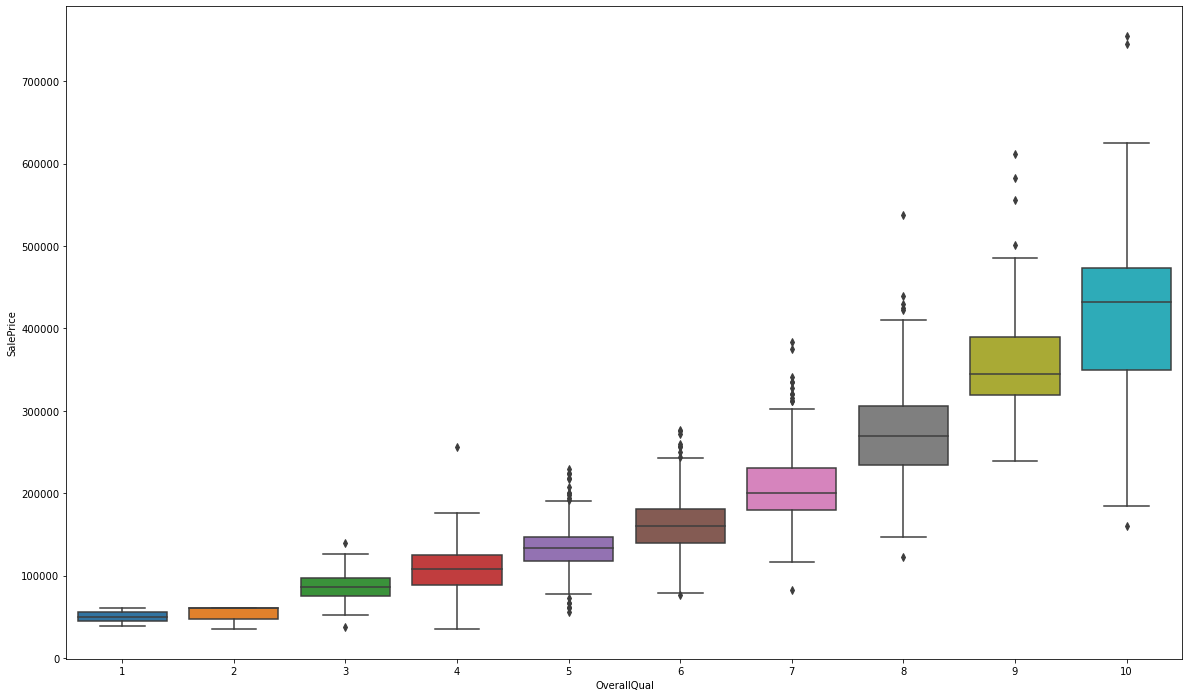

In [923]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = House)
plt.show()

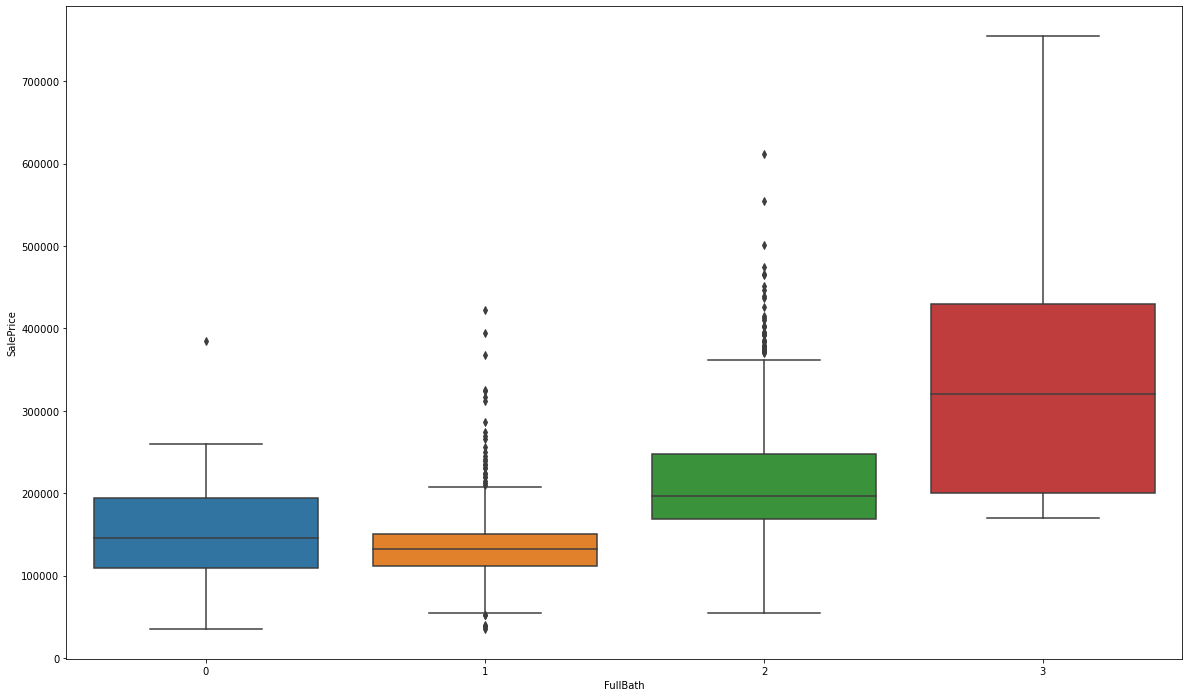

In [924]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = House)
plt.show()

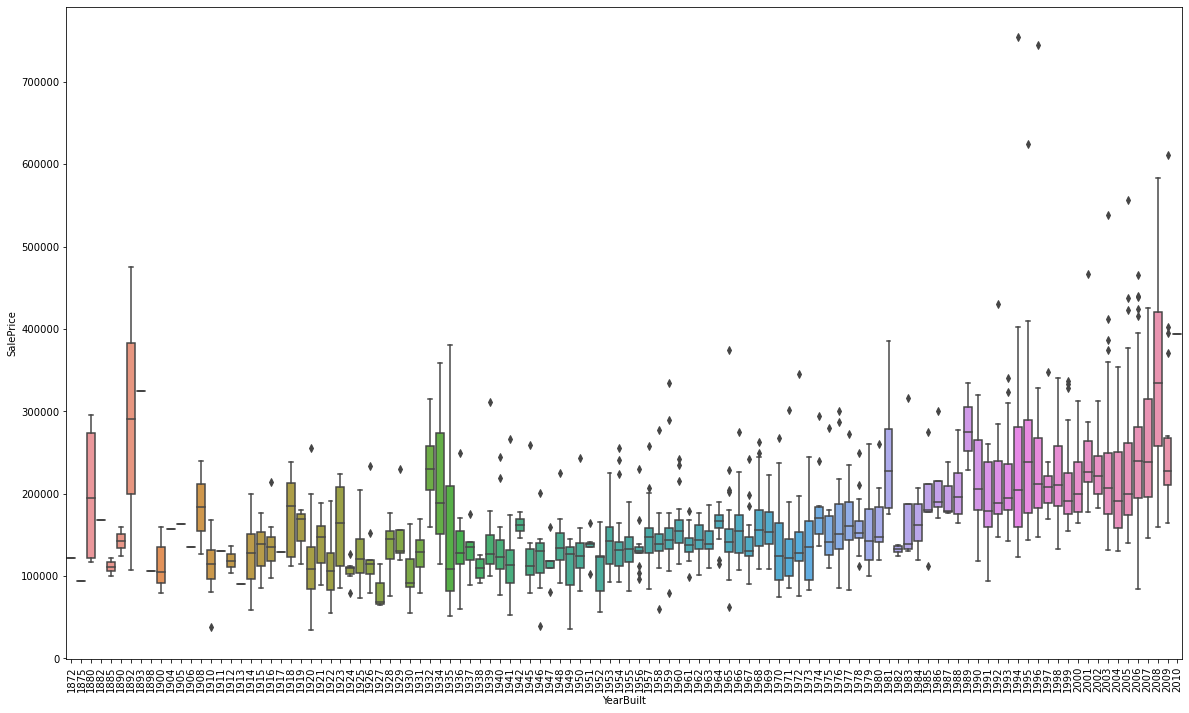

In [925]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = House)
plt.xticks(rotation=90);
plt.show()

### Insights:
- As Overall Quality increases, Sale Price increases.
- As number of full bathrooms increases, Sale Price increases.
- Sale price increases if house is recently built.

## Visualising Categorical Variables

In [926]:
## Extract categorical columns
House_cat = House.select_dtypes(include='object')
House_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,none,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


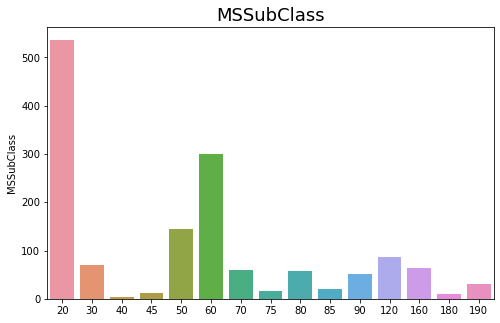

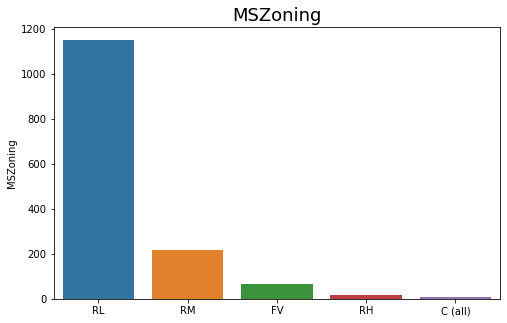

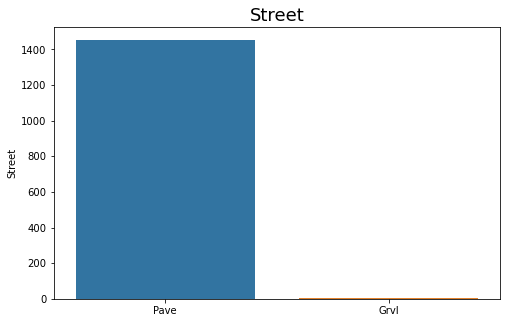

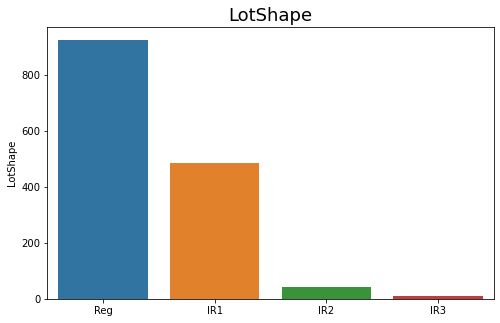

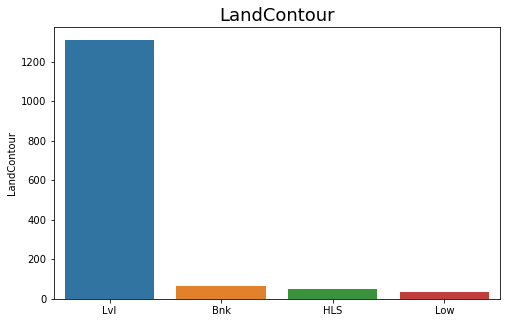

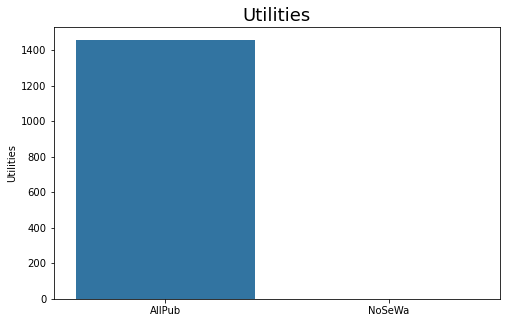

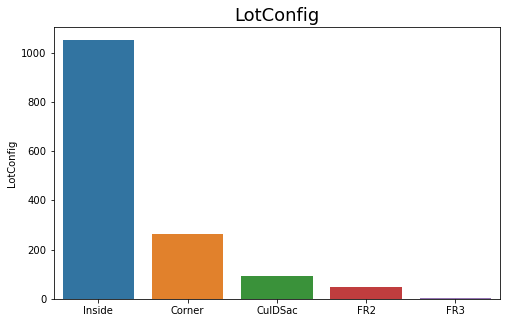

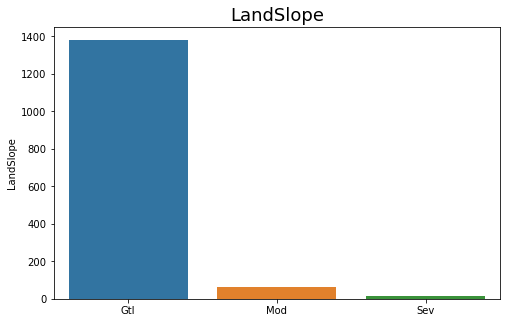

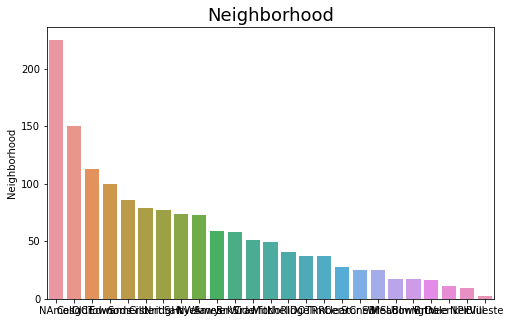

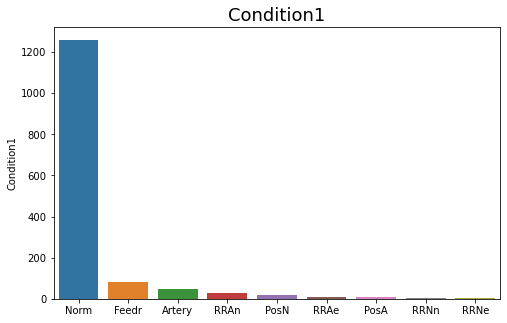

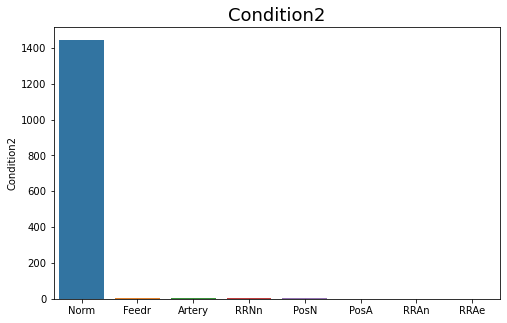

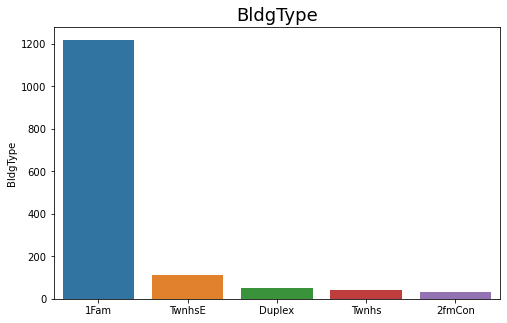

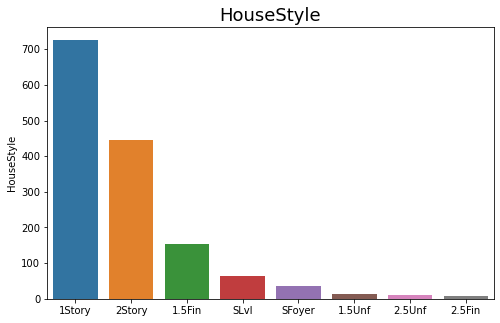

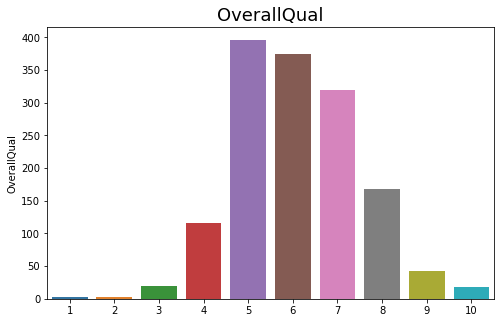

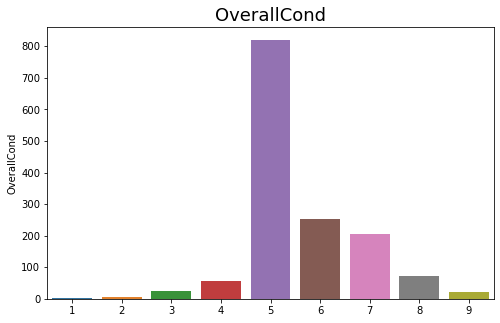

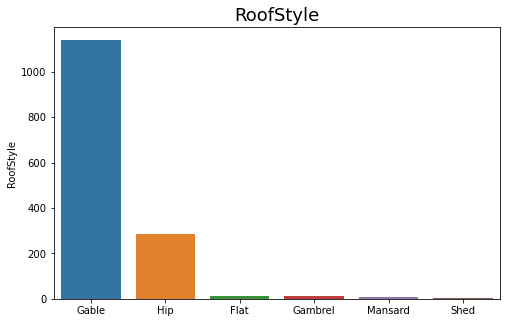

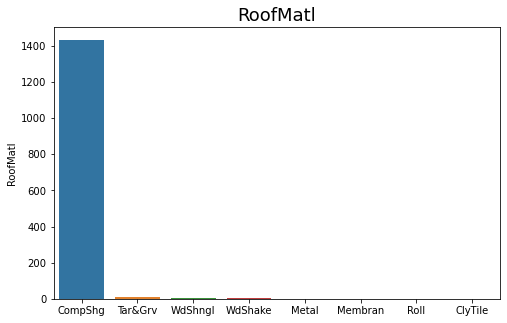

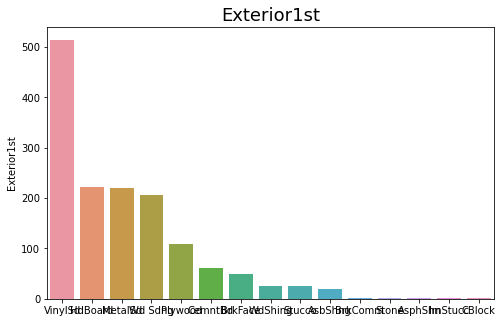

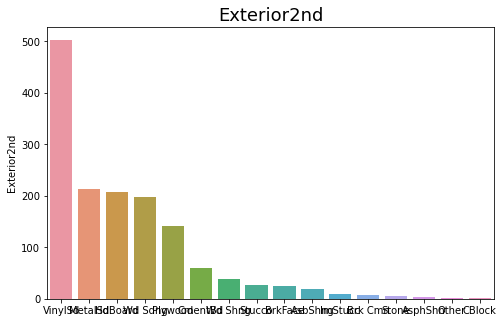

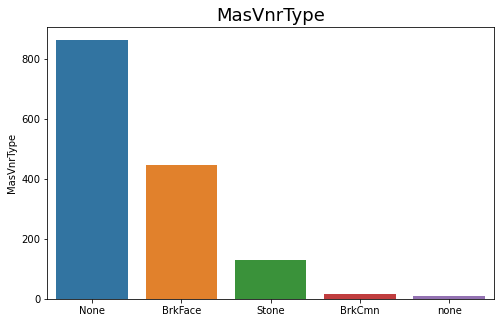

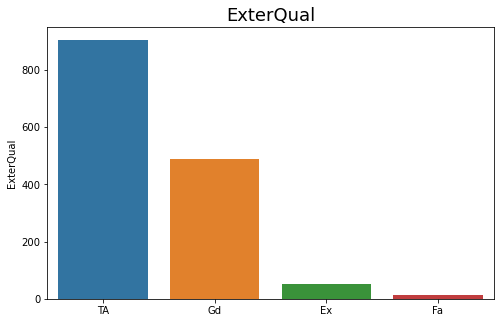

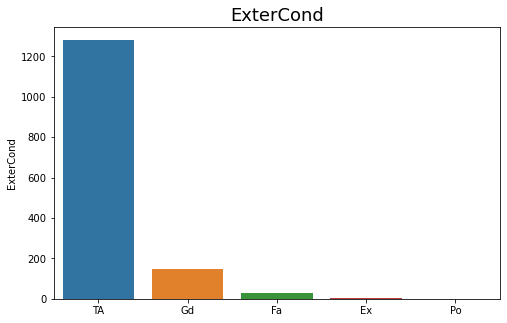

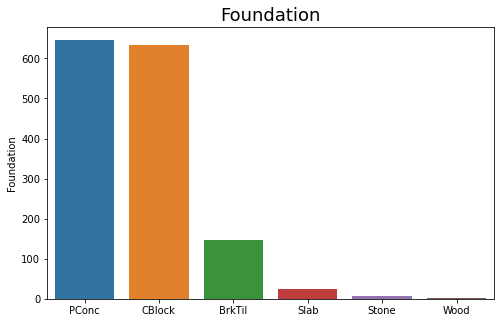

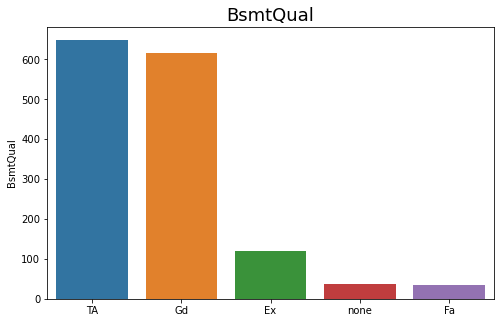

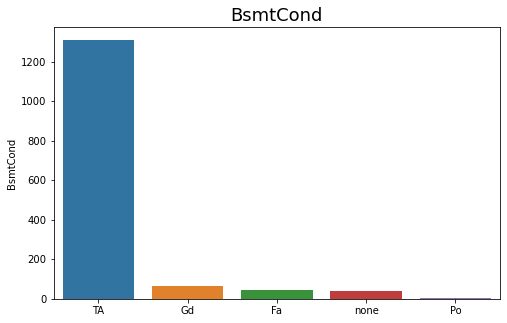

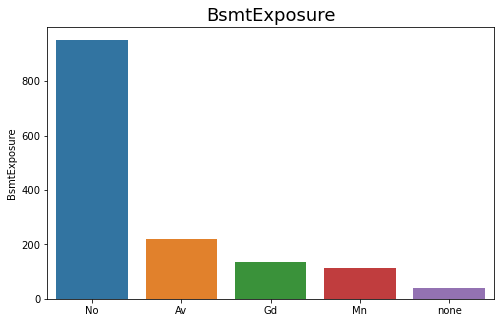

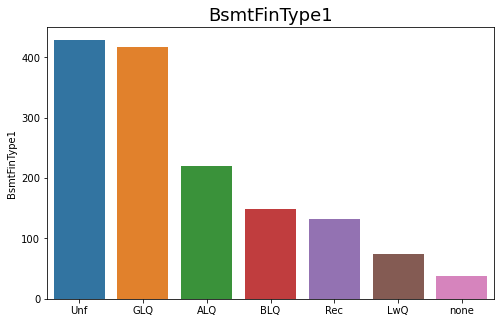

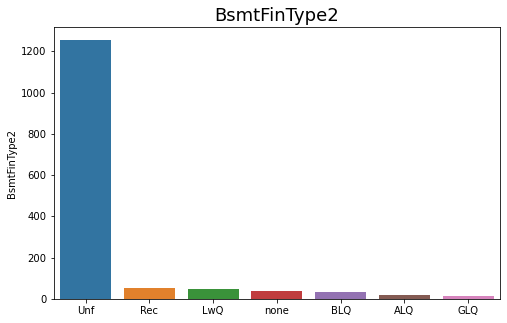

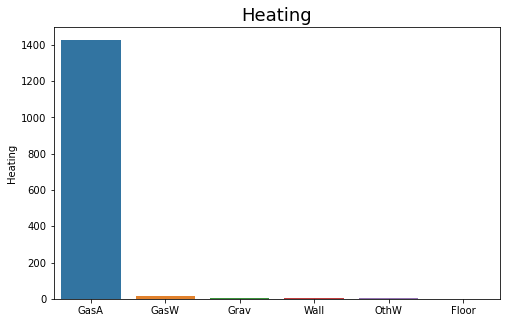

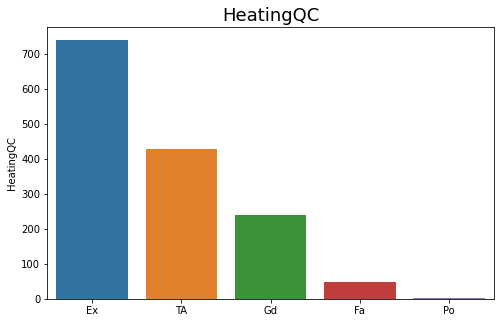

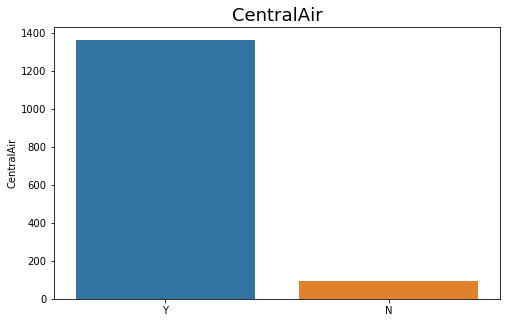

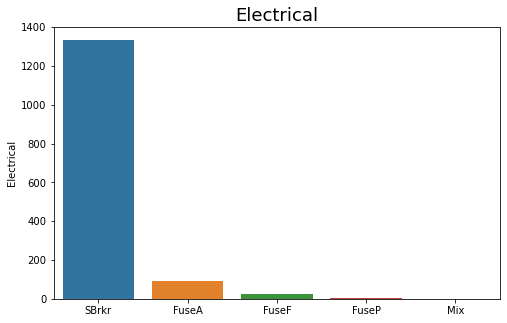

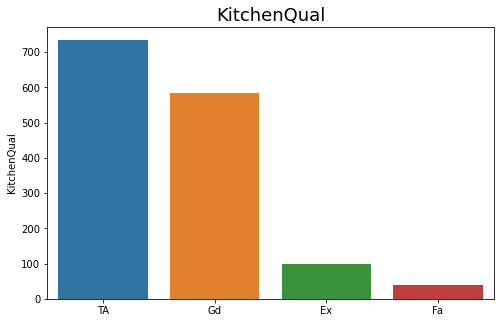

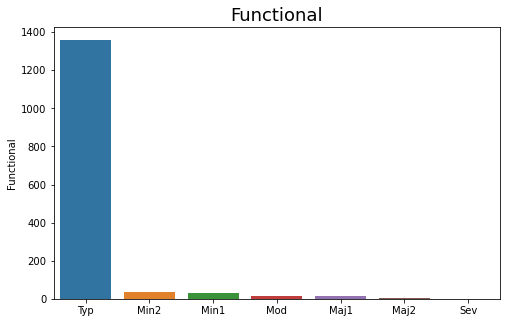

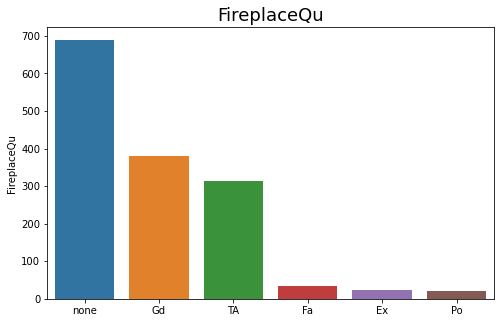

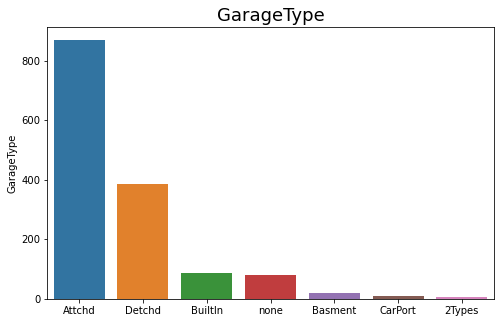

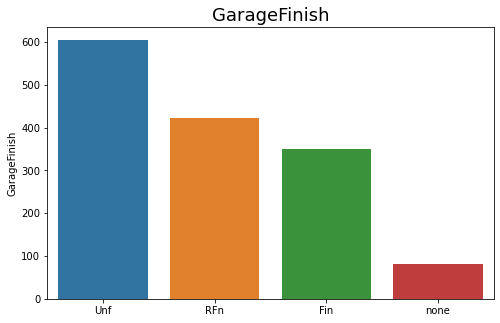

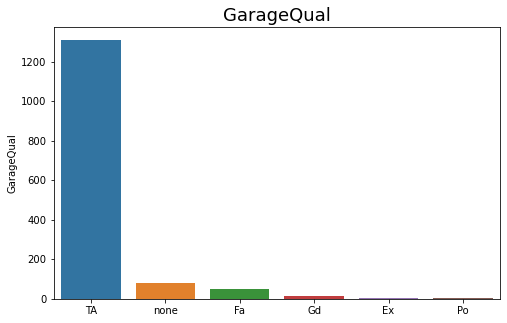

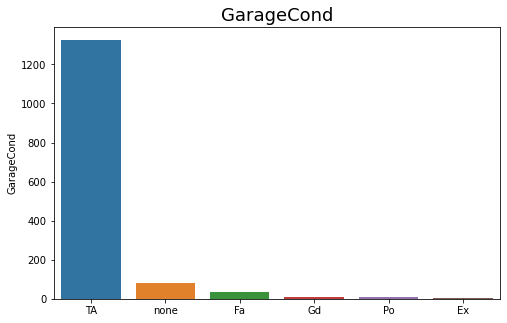

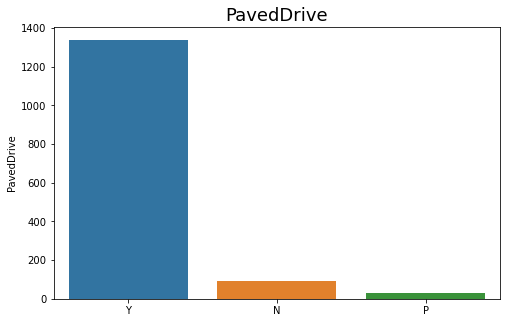

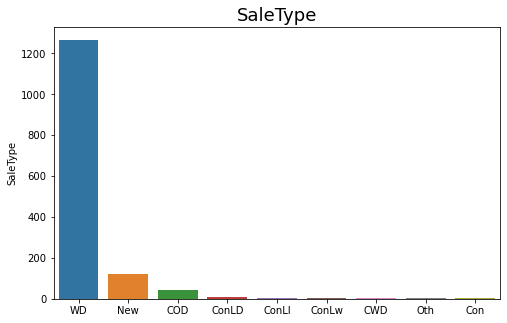

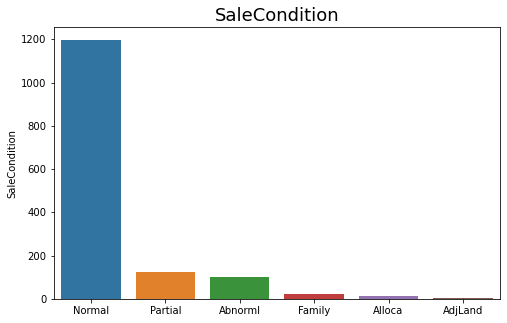

In [927]:
## Visualizing the levels of categorical columns using bar plots
for col in House_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(House_cat[col].value_counts().index,House_cat[col].value_counts())
    plt.show()

## Visualising Numeric Variables
Let's plot a pairplot of all the numeric variables

In [928]:
## Extract numerical columns
House_numeric = House.select_dtypes(include=['float64', 'int64'])
House_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


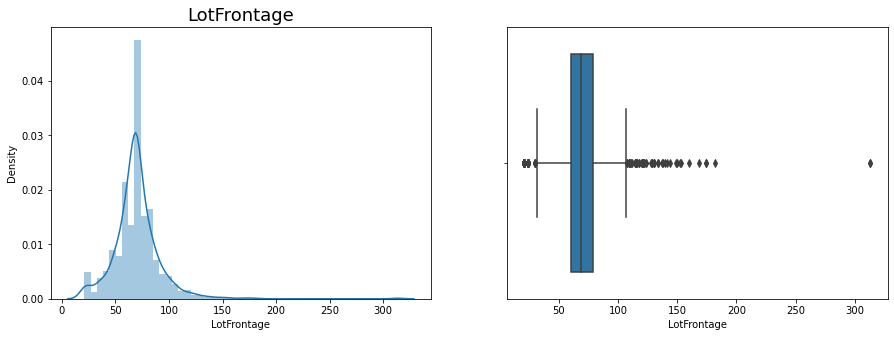

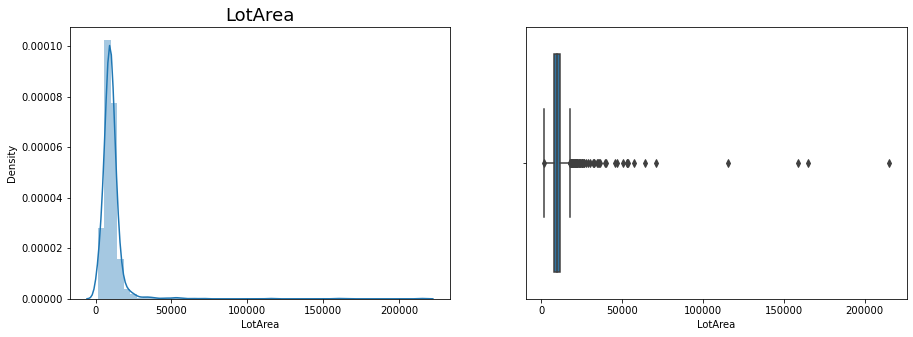

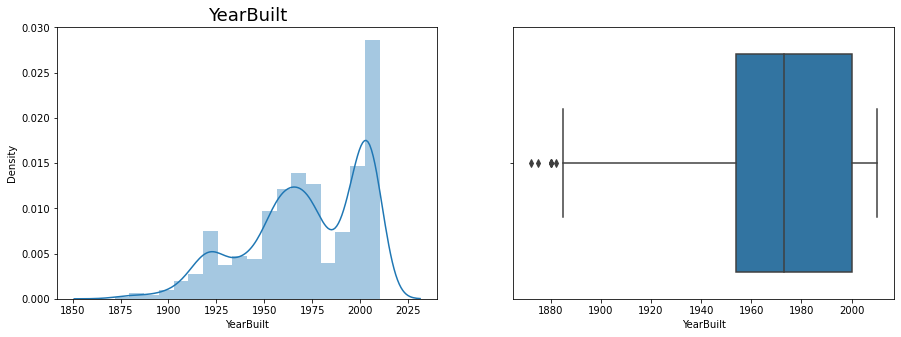

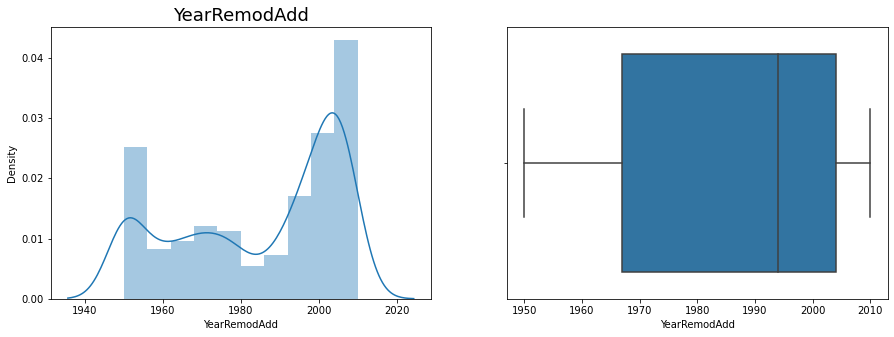

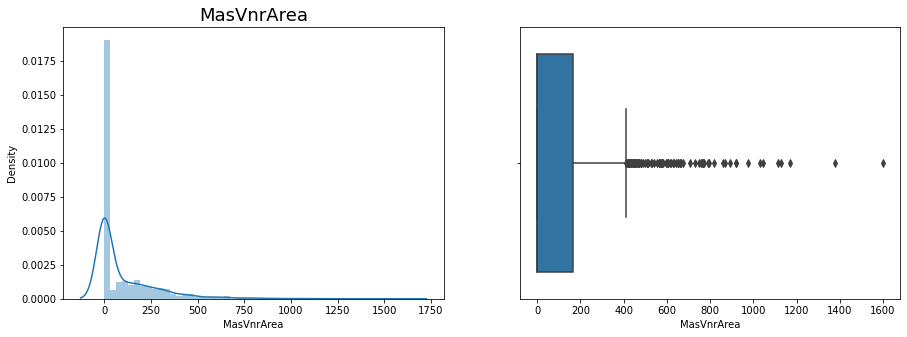

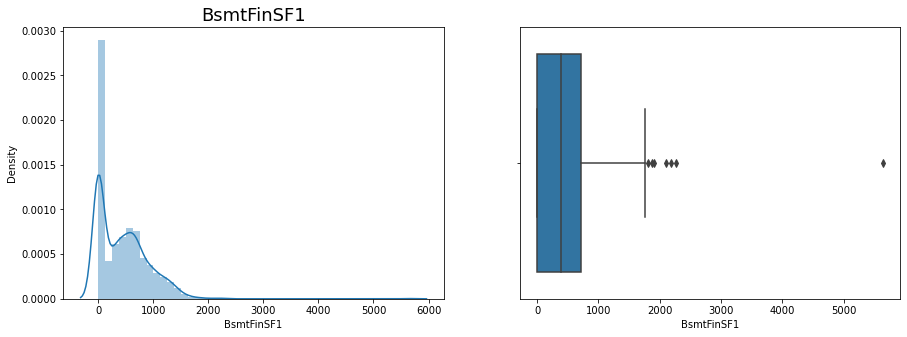

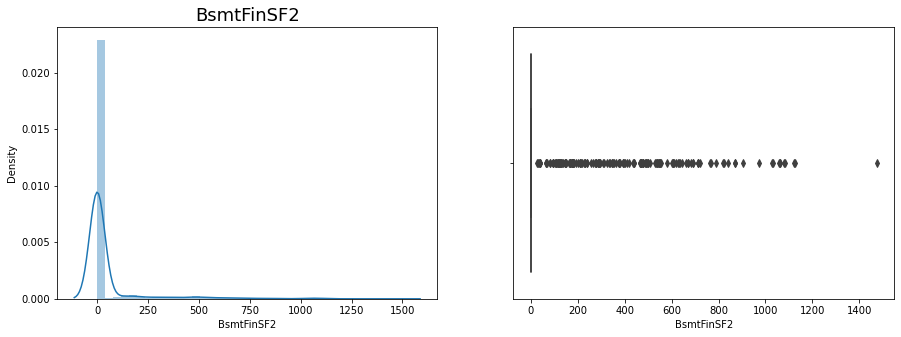

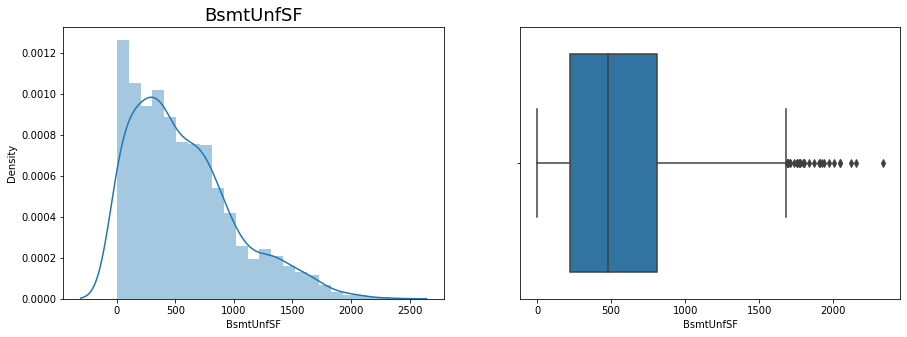

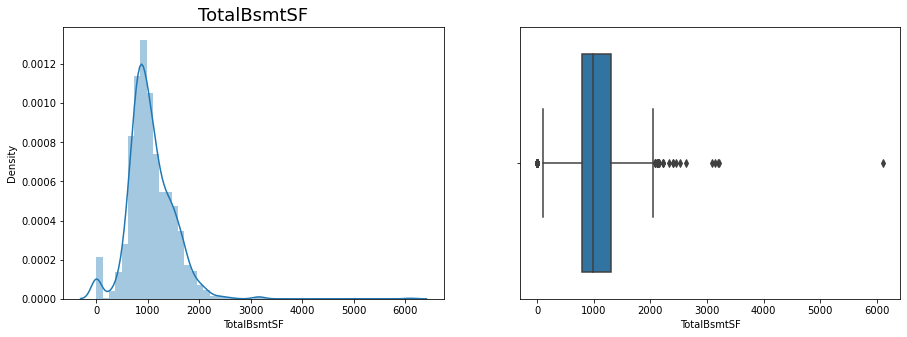

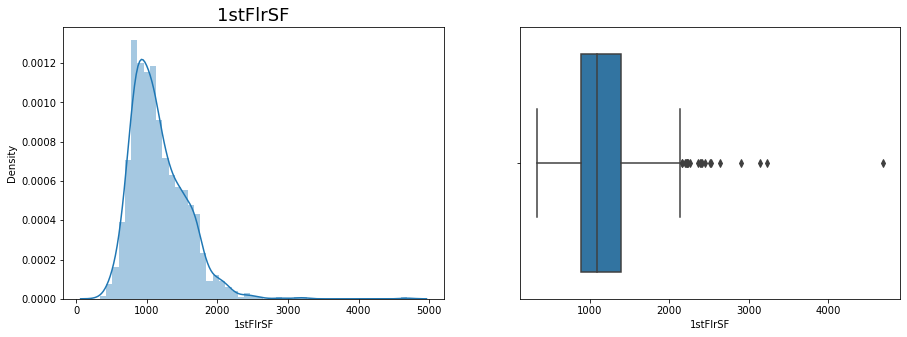

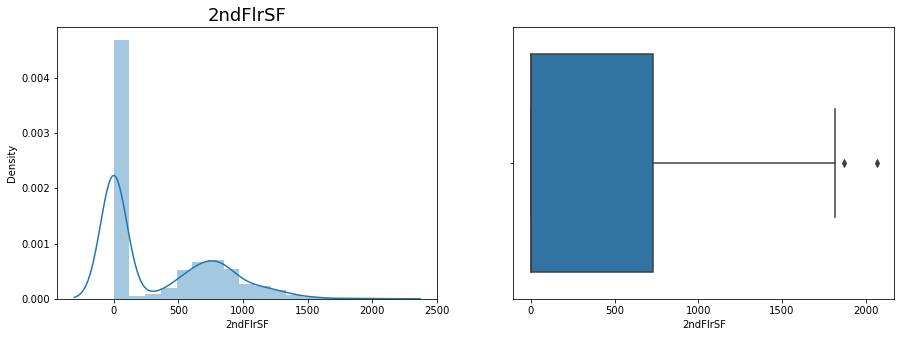

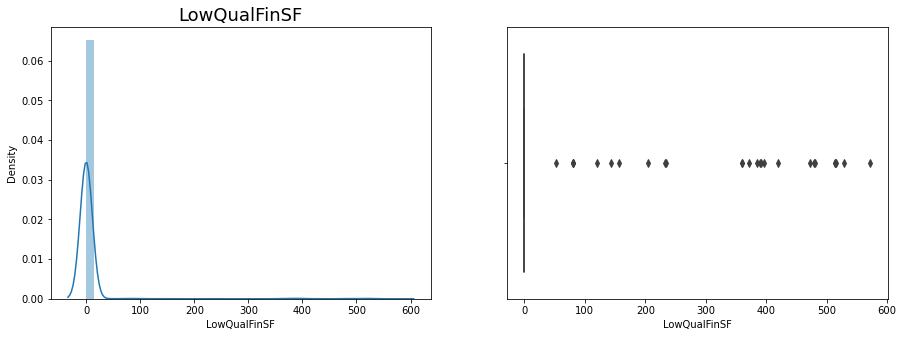

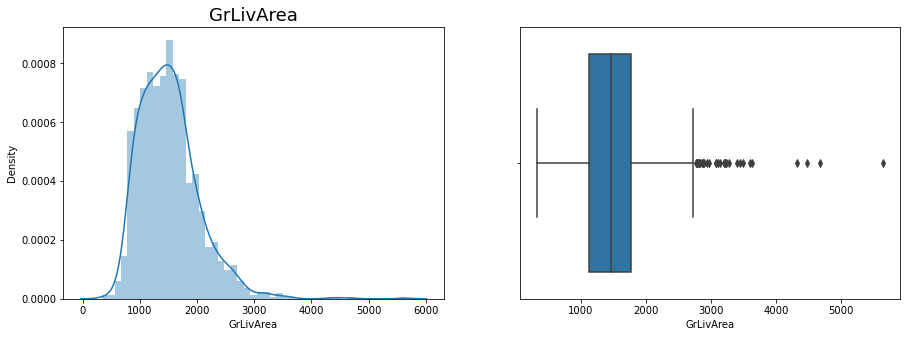

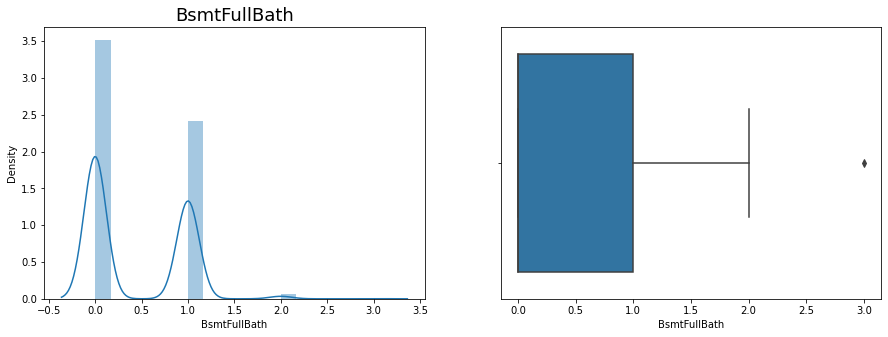

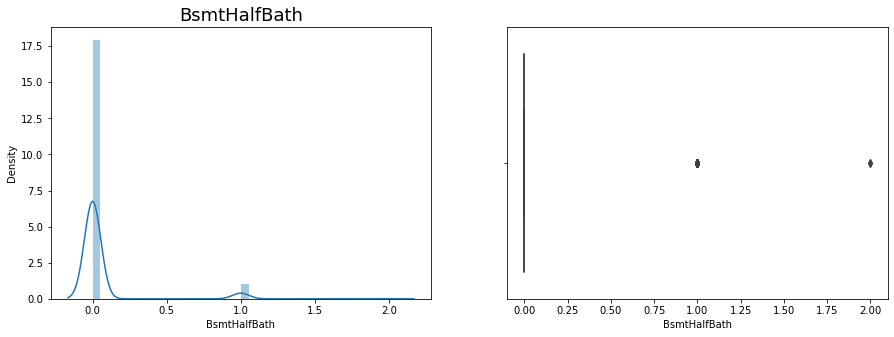

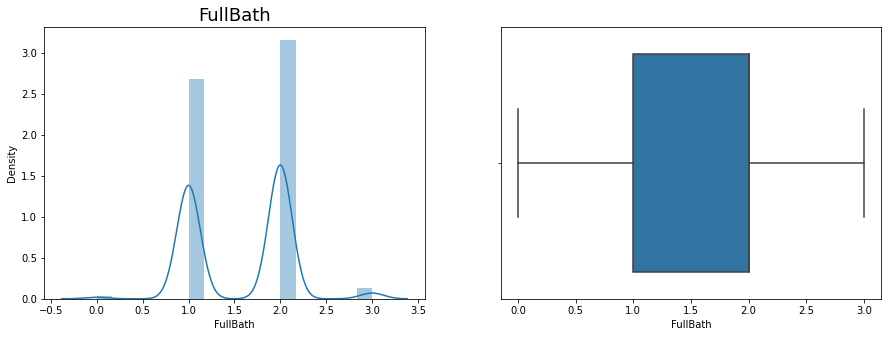

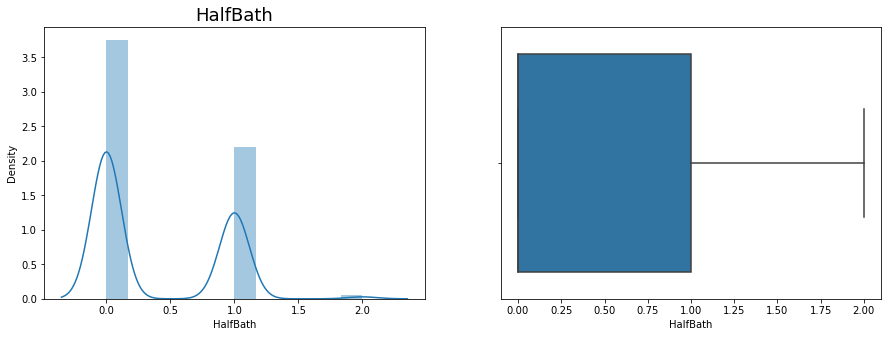

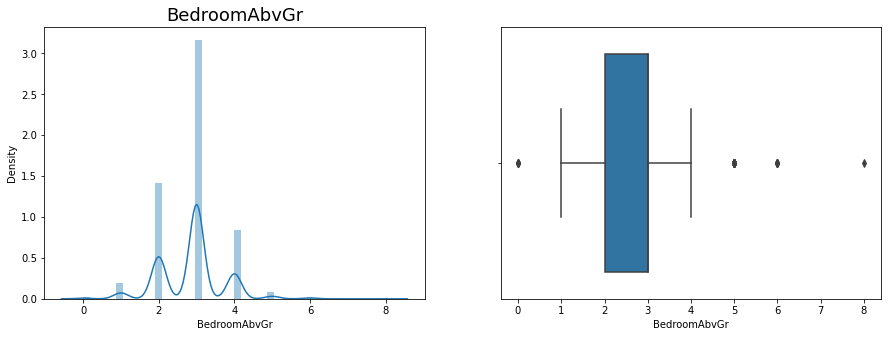

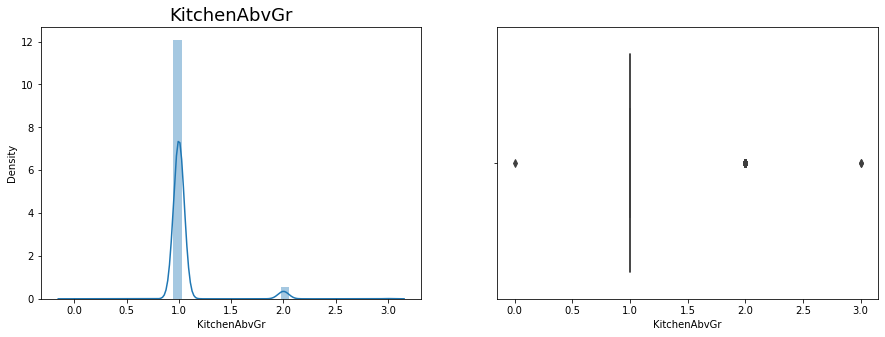

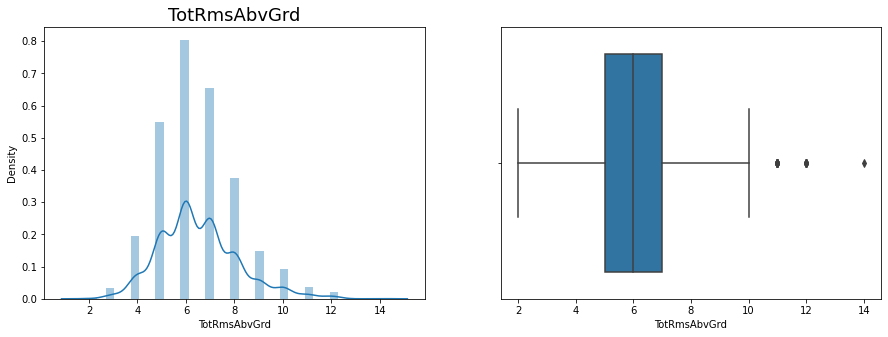

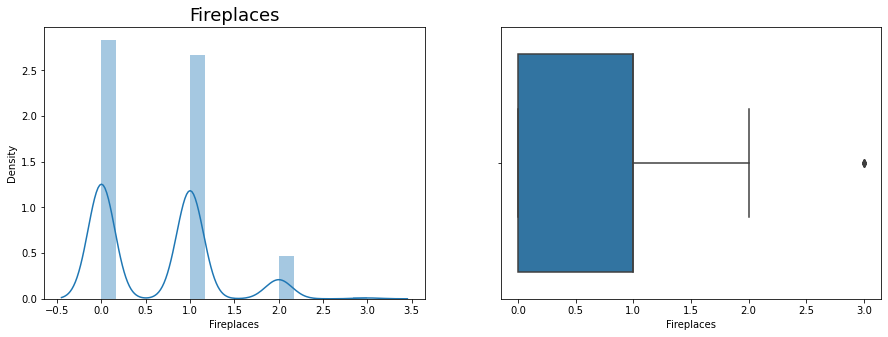

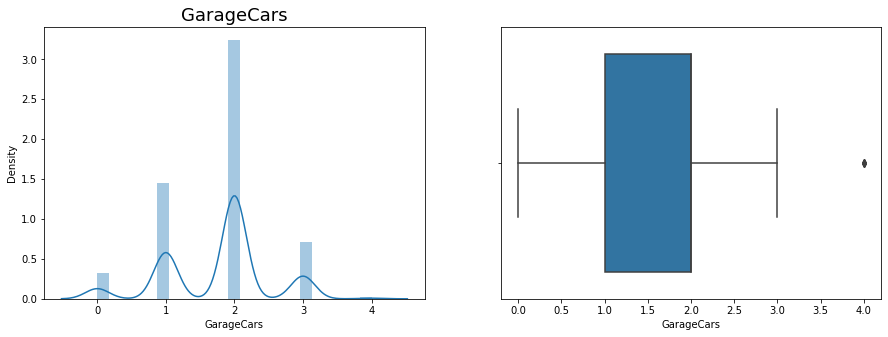

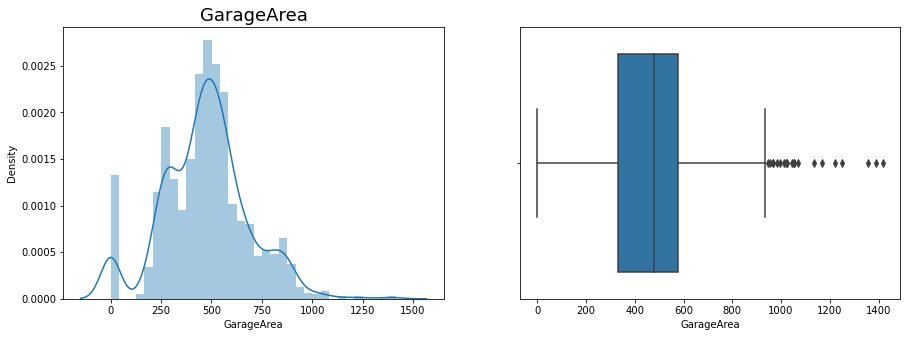

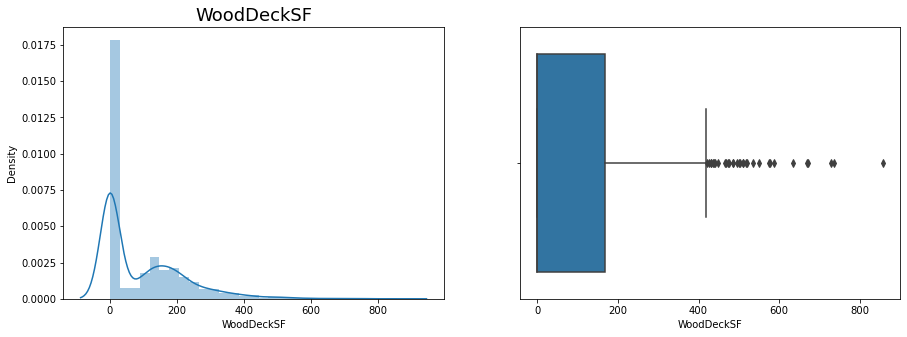

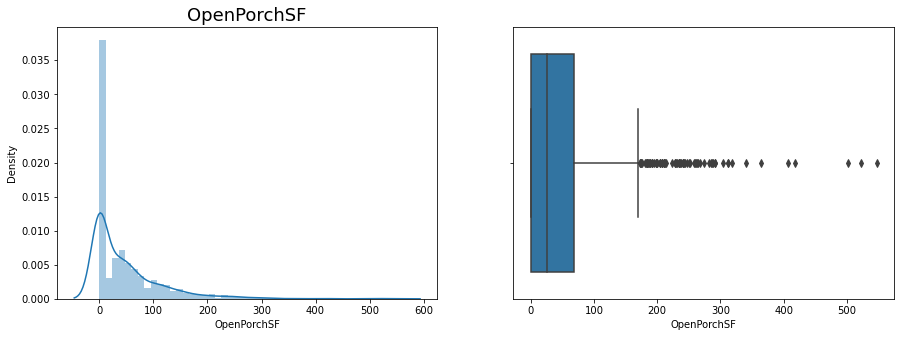

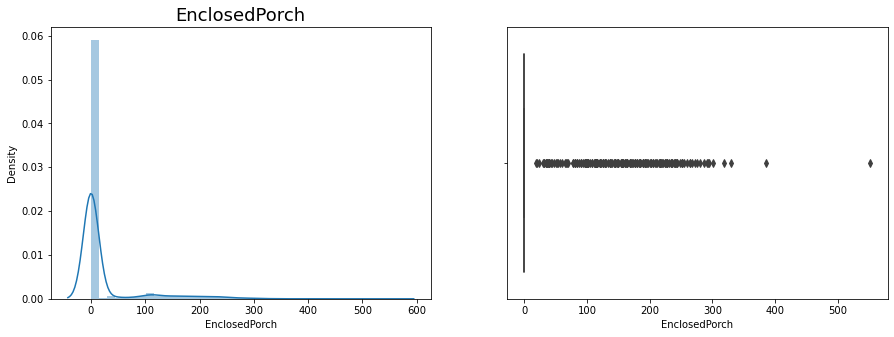

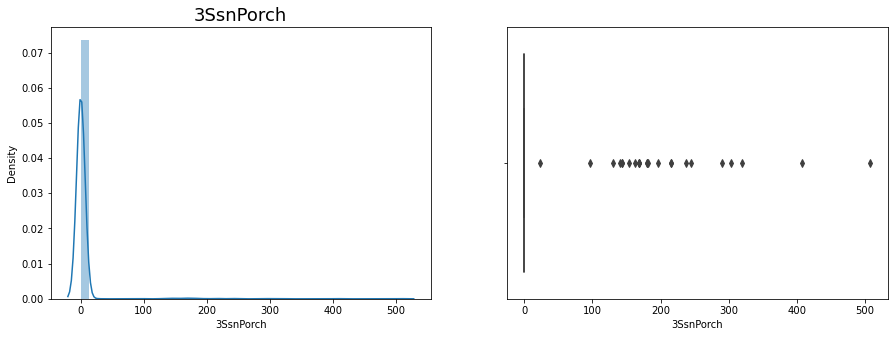

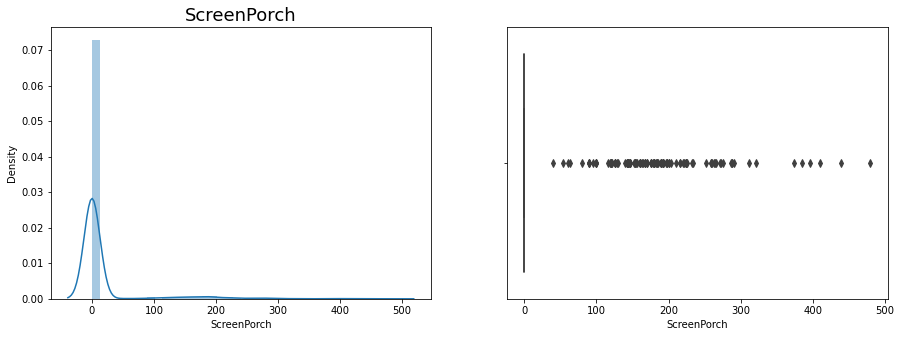

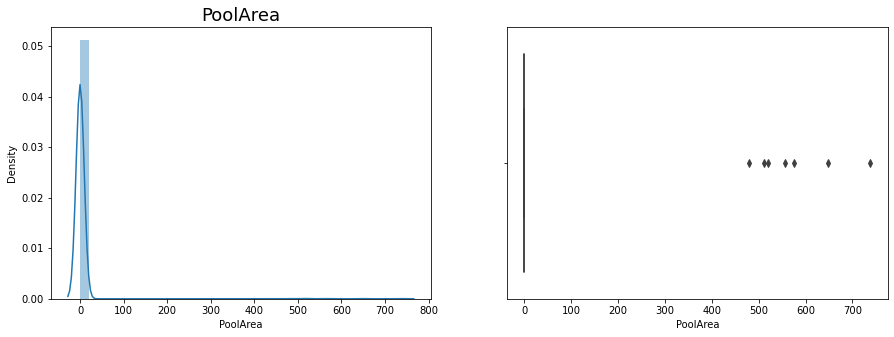

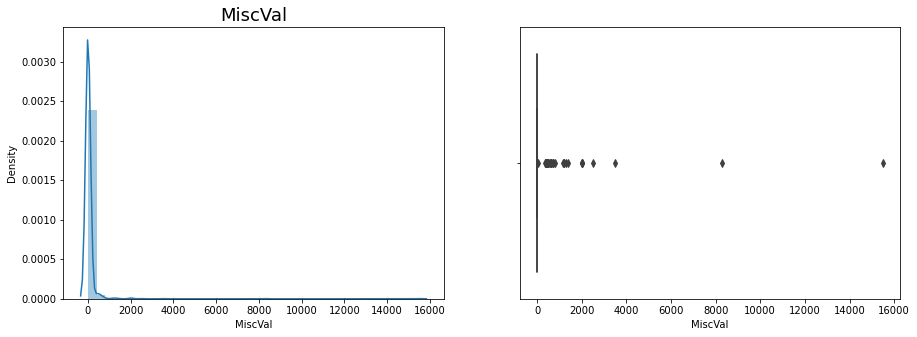

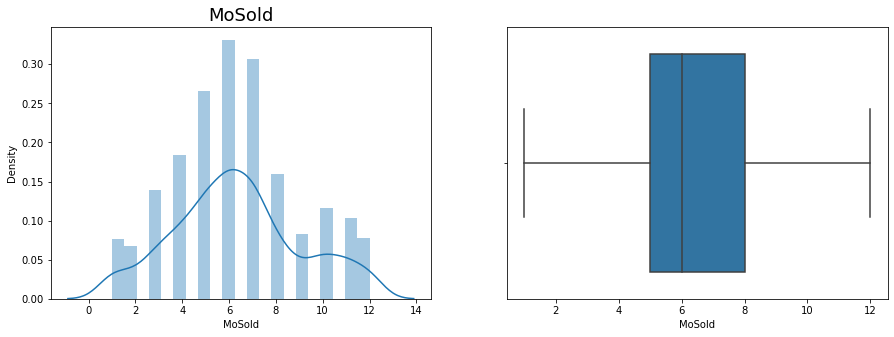

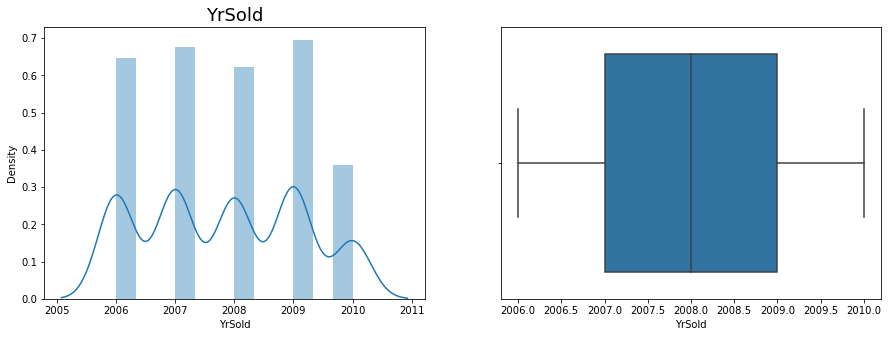

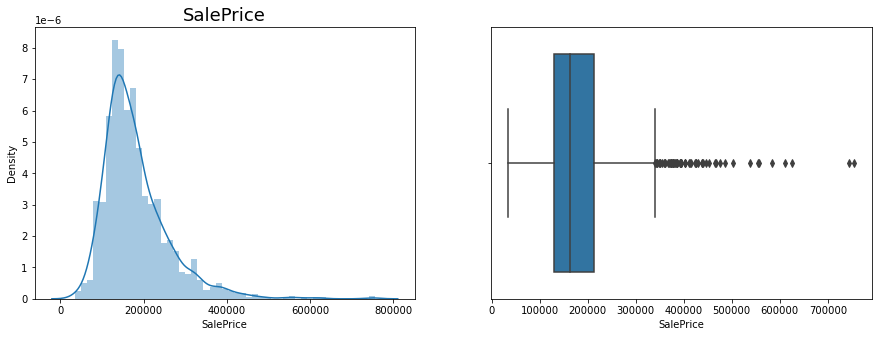

In [929]:
for col in House_numeric.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(House_numeric[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(House_numeric[col])
    plt.show() 

- Most of the columns have outliers. So, we will require to do Outlier treatment.

### Outlier treatment

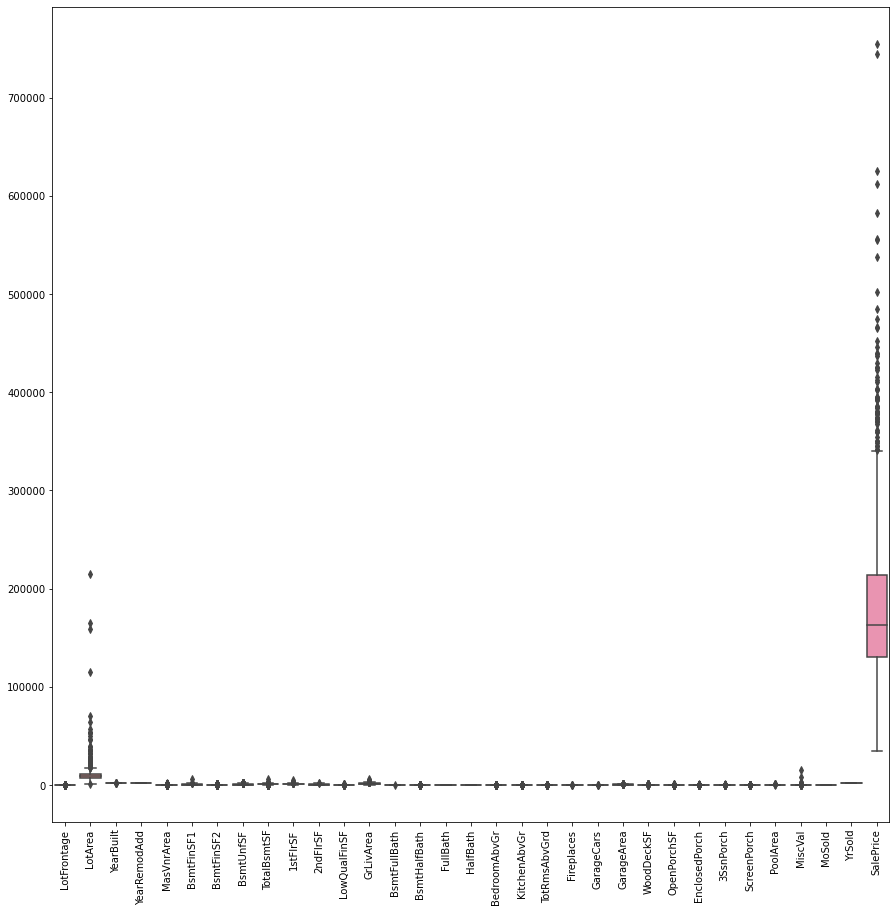

In [930]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=House_numeric);

In [931]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in House_numeric.columns:
    House_numeric[col][House_numeric[col] <= House_numeric[col].quantile(0.05)] = House_numeric[col].quantile(0.05)
    House_numeric[col][House_numeric[col] >= House_numeric[col].quantile(0.95)] = House_numeric[col].quantile(0.95)

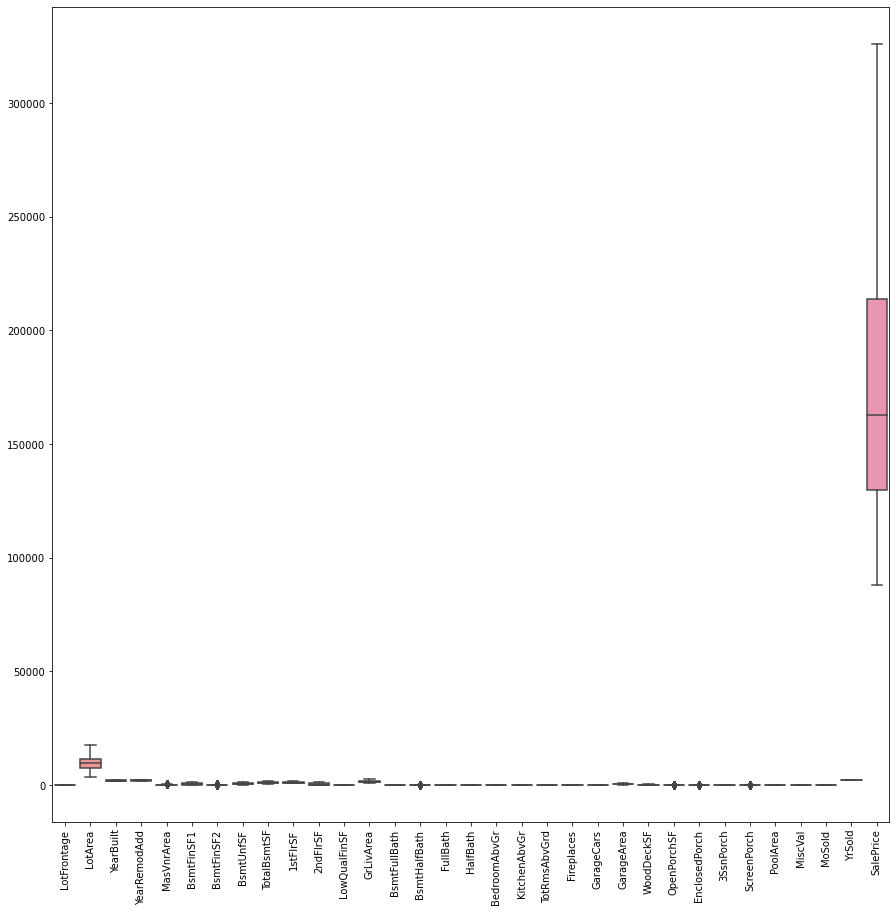

In [932]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=House_numeric);

## Step 4: Data Preparation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

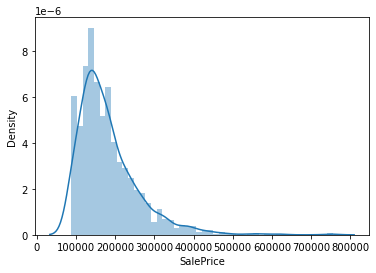

In [933]:
sns.distplot(House['SalePrice'])

- Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

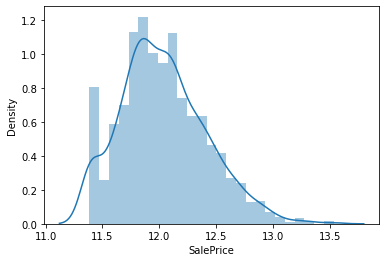

In [934]:
sns.distplot(np.log(House["SalePrice"]))

- The SalePrice data is positively skewed.

In [935]:
House["SalePrice"] = np.log(House["SalePrice"])

In [936]:
House["SalePrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64

##  Feature Engineering 

- We can derive a column for 'Age of the property' when it was sold: Name it as 'Age'

In [937]:
## Create new column for the age of the house
House['Age'] = House['YrSold'] - House['YearBuilt']

- Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [938]:
## Drop the two columns from which we created new one
House.drop(['YrSold','MoSold','YearRemodAdd','YearBuilt'], axis=1, inplace=True)

In [939]:
## View the dataframe again
House.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,WD,Normal,12.247694,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,WD,Normal,12.109011,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,WD,Normal,12.317167,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,WD,Abnorml,11.849398,90
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,WD,Normal,12.429216,8


In [940]:
# Checking the value counts
House.Street.value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [941]:
# Checking the value counts
House.Utilities.value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [942]:
# We can also drop columns that show very low variance and thus not required for predictions
House = House.drop(['Street'], axis = 1)
House = House.drop(['Utilities'], axis = 1)

- I am removing the columns having bias more than 80%

In [943]:
#Handling Data Types
datatypes = House.dtypes 
datatypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
                  ...   
MiscVal            int64
SaleType          object
SaleCondition     object
SalePrice        float64
Age                int64
Length: 70, dtype: object

In [944]:
#numerical and categorical values 
num_values = datatypes[(datatypes == 'int64') | (datatypes == float)]
cat_values = datatypes[datatypes == object] 

In [945]:
print(num_values.index)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'Age'],
      dtype='object')


In [946]:
print(cat_values.index)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


## Dummy Variable Creation

In [947]:
#Create dummy variable for categorical values
House_cat = House[cat_values.index]
House_cat_dummies = pd.get_dummies(House_cat, drop_first=True)

In [948]:
#concatenate dummy data with the earlier dataframe
House = pd.concat([House, House_cat_dummies],axis=1)

In [949]:
House.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,1,0,0,0,1,0


In [950]:
#remove unwanted columns
House.drop(House_cat.columns, axis=1, inplace=True) 

In [951]:
House.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [952]:
## Check the dimensions
House.shape

(1459, 270)

- Dummy variables are created correctly.

## Splitting the data

In [953]:
#Split the data into training and testing set
df_train, df_test = train_test_split(House, train_size=0.7, test_size=0.3, random_state=100)

In [954]:
print(df_train.shape)
print(df_test.shape)

(1021, 270)
(438, 270)


### Feature Scaling

In [955]:
#Rescaling the features
scaler = MinMaxScaler()
#apply scaler to variables other than binary values(0 and 1) and dummy variables
House_num = House[num_values.index]
listtoscale =House_num.columns

df_train[listtoscale] = scaler.fit_transform(df_train[listtoscale])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.574156,0.040455,0.000000,0.000000,0.000000,0.000000,0.000000,0.215278,0.209201,0.0,...,0,0,0,0,0,0,0,0,1,0
1416,0.353891,0.046139,0.000000,0.000000,0.000000,0.529292,0.208435,0.202315,0.505569,0.0,...,0,0,0,0,1,0,0,0,1,0
390,0.207048,0.032409,0.000000,0.189168,0.265265,0.155995,0.276561,0.136343,0.196610,0.0,...,0,0,0,0,1,0,0,0,1,0
877,0.559471,0.034416,0.473684,0.918367,0.000000,0.198910,0.763990,0.252315,0.369007,0.0,...,0,0,0,0,1,0,0,0,1,0
567,0.500734,0.040670,0.368421,0.001570,0.000000,1.000000,0.808597,0.269213,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


In [956]:
#Scale Test Data
df_test[listtoscale] = scaler.transform(df_test[listtoscale])
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,0.486050,0.050185,0.344298,0.445840,0.0,0.179837,0.253041,0.139815,0.538015,0.0,...,0,0,0,0,1,0,0,0,1,0
425,0.353891,0.008893,0.000000,0.000000,0.0,0.443460,0.106245,0.077546,0.330266,0.0,...,0,0,0,0,1,0,0,0,1,0
204,0.207048,0.009464,0.000000,0.244898,0.0,0.277929,0.162206,0.080556,0.273123,0.0,...,0,0,0,0,1,0,0,0,1,0
118,0.794420,0.050985,0.000000,1.000000,0.0,0.138283,0.935118,0.307176,0.737530,0.0,...,0,0,0,0,1,0,0,0,1,0
244,0.486050,0.034631,0.000000,0.545526,0.0,0.172343,0.347121,0.196759,0.430024,0.0,...,0,0,0,0,1,0,0,0,1,0


## Step 5: Building Model

Dividing into X and Y sets for the model building

In [957]:
#Training data
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

In [958]:
#X_train.head()
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.574156,0.040455,0.000000,0.000000,0.000000,0.000000,0.000000,0.215278,0.209201,0.0,...,0,0,0,0,0,0,0,0,1,0
1416,0.353891,0.046139,0.000000,0.000000,0.000000,0.529292,0.208435,0.202315,0.505569,0.0,...,0,0,0,0,1,0,0,0,1,0
390,0.207048,0.032409,0.000000,0.189168,0.265265,0.155995,0.276561,0.136343,0.196610,0.0,...,0,0,0,0,1,0,0,0,1,0
877,0.559471,0.034416,0.473684,0.918367,0.000000,0.198910,0.763990,0.252315,0.369007,0.0,...,0,0,0,0,1,0,0,0,1,0
567,0.500734,0.040670,0.368421,0.001570,0.000000,1.000000,0.808597,0.269213,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


In [959]:
y_train.head()

984     0.166999
1416    0.153893
390     0.140406
877     0.642323
567     0.413440
Name: SalePrice, dtype: float64

In [960]:
#Test data
X_test = df_test.drop("SalePrice", axis=1)
y_test = df_test["SalePrice"]

In [961]:
X_test

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,0.486050,0.050185,0.344298,0.445840,0.0,0.179837,0.253041,0.139815,0.538015,0.0,...,0,0,0,0,1,0,0,0,1,0
425,0.353891,0.008893,0.000000,0.000000,0.0,0.443460,0.106245,0.077546,0.330266,0.0,...,0,0,0,0,1,0,0,0,1,0
204,0.207048,0.009464,0.000000,0.244898,0.0,0.277929,0.162206,0.080556,0.273123,0.0,...,0,0,0,0,1,0,0,0,1,0
118,0.794420,0.050985,0.000000,1.000000,0.0,0.138283,0.935118,0.307176,0.737530,0.0,...,0,0,0,0,1,0,0,0,1,0
244,0.486050,0.034631,0.000000,0.545526,0.0,0.172343,0.347121,0.196759,0.430024,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.456681,0.034617,0.000000,0.656201,0.0,0.000000,0.256285,0.196296,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
266,0.500734,0.045517,0.000000,0.560440,0.0,0.059946,0.228710,0.099537,0.343341,0.0,...,0,0,0,0,1,0,0,0,1,0
210,0.456681,0.019306,0.000000,0.367347,0.0,0.269755,0.278994,0.113889,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
318,0.794420,0.039403,0.561404,0.774725,0.0,0.245232,0.670722,0.231481,0.616949,0.0,...,0,0,0,0,1,0,0,0,1,0


In [962]:
y_test

789    0.351935
425    0.199098
204    0.103818
118    0.600631
244    0.393450
         ...   
771    0.068688
266    0.345690
210    0.050075
318    0.504026
239    0.116336
Name: SalePrice, Length: 438, dtype: float64

### Apply Lasso Regression

In [963]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


# Applying Lasso Regression
lasso = Lasso()

# Applying cross validation technique due to less sample size for training data
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [964]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.101826,0.037000,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.033918,-0.042625,-0.042412,-0.036127,...,-0.039085,0.003483,1,-0.031734,-0.029556,-0.029223,-0.028964,-0.031212,-0.030138,0.001119
1,0.018751,0.006249,0.012497,0.006249,0.001,{'alpha': 0.001},-0.038217,-0.048396,-0.046262,-0.042762,...,-0.043652,0.003484,2,-0.041333,-0.039236,-0.038798,-0.039648,-0.040433,-0.039890,0.000900
2,0.012499,0.006250,0.006250,0.007655,0.01,{'alpha': 0.01},-0.071493,-0.074732,-0.073222,-0.063443,...,-0.071148,0.003988,3,-0.071790,-0.068914,-0.070297,-0.070757,-0.070509,-0.070453,0.000925
3,0.016800,0.003804,0.005723,0.005749,0.05,{'alpha': 0.05},-0.142708,-0.137763,-0.141304,-0.122768,...,-0.137068,0.007330,4,-0.136173,-0.135914,-0.136865,-0.138852,-0.136639,-0.136888,0.001037
4,0.015625,0.000003,0.003124,0.006248,0.1,{'alpha': 0.1},-0.147653,-0.143008,-0.146496,-0.129722,...,-0.142672,0.006660,5,-0.141418,-0.142236,-0.141639,-0.145634,-0.141840,-0.142553,0.001564
5,0.013876,0.008396,0.008247,0.006294,0.2,{'alpha': 0.2},-0.147653,-0.143008,-0.146496,-0.129722,...,-0.142672,0.006660,5,-0.141418,-0.142236,-0.141639,-0.145634,-0.141840,-0.142553,0.001564
6,0.012502,0.006251,0.006250,0.007654,0.3,{'alpha': 0.3},-0.147653,-0.143008,-0.146496,-0.129722,...,-0.142672,0.006660,5,-0.141418,-0.142236,-0.141639,-0.145634,-0.141840,-0.142553,0.001564
7,0.012501,0.006250,0.006250,0.007654,0.4,{'alpha': 0.4},-0.147653,-0.143008,-0.146496,-0.129722,...,-0.142672,0.006660,5,-0.141418,-0.142236,-0.141639,-0.145634,-0.141840,-0.142553,0.001564
8,0.015623,0.009880,0.009374,0.007654,0.5,{'alpha': 0.5},-0.147653,-0.143008,-0.146496,-0.129722,...,-0.142672,0.006660,5,-0.141418,-0.142236,-0.141639,-0.145634,-0.141840,-0.142553,0.001564
9,0.012501,0.006251,0.006248,0.007653,0.6,{'alpha': 0.6},-0.147653,-0.143008,-0.146496,-0.129722,...,-0.142672,0.006660,5,-0.141418,-0.142236,-0.141639,-0.145634,-0.141840,-0.142553,0.001564


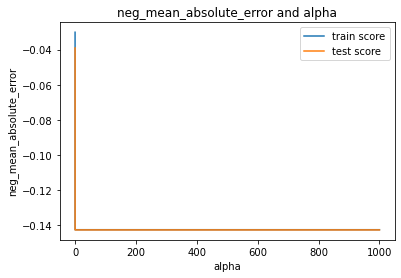

In [965]:
# plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])


plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')

plt.title("neg_mean_absolute_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [966]:
#Finding best alpha value for tuning the model
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [967]:
lasso_model_cv.best_score_

-0.0390852450120575

In [968]:
#Apply optimal alpha value to fit the model
alpha=0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [969]:
#printing coefficient values of features in lasso model
lasso.coef_

array([ 2.02331776e-02,  9.10050849e-02,  0.00000000e+00,  3.81083552e-02,
        1.63990301e-02, -0.00000000e+00,  1.43719559e-01,  0.00000000e+00,
        1.81091379e-01,  0.00000000e+00,  8.77557461e-02,  1.13194142e-02,
       -0.00000000e+00,  1.93942554e-02,  1.80873709e-02,  0.00000000e+00,
        0.00000000e+00,  3.48986592e-02,  1.47710777e-02,  6.00611394e-02,
        0.00000000e+00,  1.75696599e-02,  2.93775919e-03,  1.20290661e-02,
        0.00000000e+00,  1.60079179e-02,  0.00000000e+00,  0.00000000e+00,
       -6.20914963e-02, -9.93326058e-03, -0.00000000e+00, -0.00000000e+00,
        1.88338954e-04, -0.00000000e+00,  2.13574173e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.59305973e-02, -1.73173346e-02,
       -2.42940835e-02, -0.00000000e+00, -1.54084085e-02,  3.80096916e-02,
        3.55798971e-02,  1.62688968e-02, -0.00000000e+00,  8.35813556e-03,
       -2.18105538e-02,  5.84264788e-04,  1.60815171e-02,  3.87742869e-03,
        1.19307265e-02,  

- There are many features which have 0 coefficient means lasso has eliminated these features.
- The optimal values of lambda with Lasso regression is 0.0001

## Apply Ridge Regression

In [970]:
#List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Applying Ridge
ridge = Ridge()

# Applying cross validation technique due to less sample size for training data
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [971]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031629,0.034194,0.004924,0.006385,0.0001,{'alpha': 0.0001},-0.037045,-0.047299,-0.046736,-0.041089,...,-0.042541,0.003913,24,-0.025223,-0.023597,-0.022881,-0.025550,-0.024595,-0.024369,0.000999
1,0.013647,0.007286,0.005141,0.005706,0.001,{'alpha': 0.001},-0.037003,-0.047212,-0.046647,-0.041043,...,-0.042508,0.003879,23,-0.025261,-0.023611,-0.022902,-0.025555,-0.024623,-0.024390,0.000999
2,0.018748,0.006250,0.006250,0.007654,0.01,{'alpha': 0.01},-0.036751,-0.046447,-0.046009,-0.040644,...,-0.042255,0.003613,22,-0.025662,-0.023786,-0.023173,-0.025612,-0.024922,-0.024631,0.000995
3,0.012501,0.006250,0.006249,0.007654,0.05,{'alpha': 0.05},-0.036927,-0.045039,-0.044650,-0.039632,...,-0.041897,0.003133,21,-0.027021,-0.024740,-0.024299,-0.025824,-0.025982,-0.025573,0.000964
4,0.021876,0.007655,0.006250,0.007655,0.1,{'alpha': 0.1},-0.037307,-0.044544,-0.044230,-0.038942,...,-0.041776,0.003034,20,-0.027947,-0.025614,-0.025081,-0.026033,-0.026708,-0.026277,0.000990
5,0.018747,0.006252,0.009376,0.007656,0.2,{'alpha': 0.2},-0.037547,-0.043945,-0.043919,-0.038220,...,-0.041502,0.002962,19,-0.028764,-0.026616,-0.025896,-0.026330,-0.027479,-0.027017,0.001015
6,0.015625,0.000003,0.000000,0.000000,0.3,{'alpha': 0.3},-0.037572,-0.043550,-0.043747,-0.037816,...,-0.041258,0.002911,17,-0.029167,-0.027169,-0.026339,-0.026573,-0.027954,-0.027441,0.001028
7,0.011855,0.006477,0.011438,0.006957,0.4,{'alpha': 0.4},-0.037474,-0.043301,-0.043574,-0.037558,...,-0.041043,0.002882,16,-0.029436,-0.027531,-0.026629,-0.026773,-0.028306,-0.027735,0.001040
8,0.018698,0.006351,0.001017,0.001991,0.5,{'alpha': 0.5},-0.037338,-0.043118,-0.043419,-0.037357,...,-0.040863,0.002872,15,-0.029651,-0.027792,-0.026852,-0.026955,-0.028579,-0.027966,0.001050
9,0.015625,0.000005,0.006248,0.007653,0.6,{'alpha': 0.6},-0.037195,-0.042966,-0.043301,-0.037194,...,-0.040714,0.002876,14,-0.029832,-0.027998,-0.027041,-0.027132,-0.028810,-0.028163,0.001054


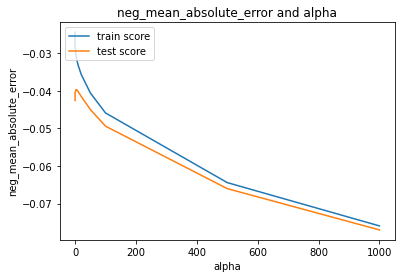

In [972]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title("neg_mean_absolute_error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [973]:
#Finding optimal value of alpha
ridge_model_cv.best_params_

{'alpha': 4.0}

In [974]:
ridge_model_cv.best_score_

-0.03963385360397155

In [975]:
#Apply optimal value of alpha to fit the model
alpha=4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=4.0)

In [976]:
#printing coefficient values of features in ridge model
ridge.coef_

array([ 2.09824603e-02,  3.88654402e-02,  2.00094840e-03,  4.65129338e-02,
        2.71375342e-02,  1.29510543e-02,  1.05939757e-01,  2.74187153e-02,
        1.05507261e-01,  0.00000000e+00,  6.49634412e-02,  1.00251658e-02,
       -1.39176488e-03,  2.59105963e-02,  2.23605729e-02,  6.92611690e-03,
        0.00000000e+00,  4.29941773e-02,  2.14347538e-02,  5.30601670e-02,
        2.01277280e-02,  1.97305869e-02,  1.31123363e-02,  1.41373633e-02,
        0.00000000e+00,  1.64345103e-02,  0.00000000e+00,  0.00000000e+00,
       -3.93090440e-02, -1.77999462e-02, -5.46559305e-03, -1.59897382e-03,
        1.86907891e-03, -1.24891314e-04,  2.26340155e-02,  1.28541913e-02,
       -5.28665933e-03,  9.24059534e-04, -1.58552009e-02, -1.23086720e-02,
       -2.25862836e-02, -1.07728365e-02, -1.14410748e-02,  3.42603892e-02,
        3.22542984e-02,  1.44416999e-02,  1.32317063e-03,  1.04500017e-02,
       -1.97548308e-02,  6.81032532e-04,  2.34653299e-02,  1.24633651e-02,
        1.58027246e-02,  

Observation

The optimal values of lambda with Ridge regression is 4.0

## Step 6: Model Evaluation
### Check Lasso Model Evaluation
#### Model evaluation on training data

In [977]:
y_train_pred = lasso.predict(X_train)
metrics.r2_score(y_train, y_train_pred)

0.9388195250331824

#### Model evaluation on test data

In [978]:
y_test_pred = lasso.predict(X_test)
metrics.r2_score(y_test, y_test_pred)

0.9085518213057991

- R2 score on training set is 93.8% and R2 score on testing set is 90.8% which is good.

### Check Ridge Model Evaluation
#### Model evaluation on training data

In [979]:
y_train_pred = ridge.predict(X_train)
metrics.r2_score(y_train, y_train_pred)

0.9380717706047073

#### Model evaluation on test data

In [980]:
y_test_pred = ridge.predict(X_test)
metrics.r2_score(y_test, y_test_pred)

0.9064821001406849

- R2 score on training set is 93.8% and R2 score on testing set is 90.6% which is good.

### Choosing the best model

In [981]:
coef_df = pd.DataFrame(index=X_train.columns)
coef_df.rows = X_train.columns
coef_df['Ridge'] = ridge.coef_
coef_df['Lasso'] = lasso.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df)

                        Ridge     Lasso  abs_value_coeff
2ndFlrSF             0.105507  0.181091         0.181091
Condition2_PosN     -0.053060 -0.148530         0.148530
TotalBsmtSF          0.105940  0.143720         0.143720
LotArea              0.038865  0.091005         0.091005
GrLivArea            0.064963  0.087756         0.087756
...                       ...       ...              ...
Exterior2nd_BrkFace  0.001257 -0.000000         0.000000
Exterior2nd_Brk Cmn -0.001772 -0.000000         0.000000
Exterior2nd_AsphShn  0.008782  0.000000         0.000000
Exterior1st_VinylSd -0.003123  0.000000         0.000000
RoofMatl_Roll        0.003276  0.000000         0.000000

[269 rows x 3 columns]


### Check features eliminated by Lasso

In [982]:
FeaturesEliminated = coef_df[coef_df['abs_value_coeff'] == 0].index.tolist()

In [983]:
FeaturesEliminated

['MasVnrArea',
 'BsmtUnfSF',
 '1stFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageArea',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_60',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_180',
 'MSZoning_RM',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_NPkVill',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Condition1_Feedr',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_SFoyer',
 'OverallQual_2',
 'OverallCond_5',
 'RoofStyle_Gambrel',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_ImStucc',
 'E

#### Insights:

- With Lasso model,R2 score on training set is 93.8% and R2 score on testing set is 90.8% which is good. which is good. Model has performed well on train and test data.
- With Ridge model, R2 score on training set is 93.8% and R2 score on testing set is 90.6% which is good. which is good. Model has performed well on train and test data.
- Model evaluation results for both lasso and ridge model on train data as well as test data are at par. Ridge model is performing slightly better.
- We have evaluated models based on 270 features. Since most of the features are eliminated by Lasso hence we will select Lasso as the best model.

### Final model slected is Lasso Regression with alpha 0.0001 
### Top 10 significant features in predicting the price of a house

In [984]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
2ndFlrSF,0.105507,0.181091,0.181091
Condition2_PosN,-0.053060,-0.148530,0.148530
TotalBsmtSF,0.105940,0.143720,0.143720
LotArea,0.038865,0.091005,0.091005
GrLivArea,0.064963,0.087756,0.087756
OverallQual_9,0.061837,0.079164,0.079164
OverallCond_9,0.047444,0.070401,0.070401
RoofMatl_WdShngl,0.051112,0.064783,0.064783
Age,-0.039309,-0.062091,0.062091
OverallQual_10,0.037672,0.060221,0.060221


- How well those variables describe the price of a house.

In [985]:
sorted_coef_df

,Ridge,Lasso,abs_value_coeff
2ndFlrSF,0.105507,0.181091,0.181091
Condition2_PosN,-0.053060,-0.148530,0.148530
TotalBsmtSF,0.105940,0.143720,0.143720
LotArea,0.038865,0.091005,0.091005
GrLivArea,0.064963,0.087756,0.087756
...,...,...,...
Exterior2nd_BrkFace,0.001257,-0.000000,0.000000
Exterior2nd_Brk Cmn,-0.001772,-0.000000,0.000000
Exterior2nd_AsphShn,0.008782,0.000000,0.000000
Exterior1st_VinylSd,-0.003123,0.000000,0.000000


## Problem Statement -Part II

# Q1- Answer
### Double the value of alpha 0.0001 for Lasso Regression

In [986]:
alpha=0.0002
lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.0002)

### Lasso model evaluation on train data

In [987]:
y_train_pred2 = lasso2.predict(X_train)
metrics.r2_score(y_train, y_train_pred2)

0.9315710139114814

In [988]:
lasso2.coef_

array([ 2.12784526e-02,  1.61013257e-02,  0.00000000e+00,  3.59804289e-02,
        5.35522947e-03, -0.00000000e+00,  1.52984082e-01,  0.00000000e+00,
        1.67052509e-01,  0.00000000e+00,  7.88302158e-02,  1.18211738e-02,
        0.00000000e+00,  1.98550553e-02,  1.93394871e-02,  0.00000000e+00,
        0.00000000e+00,  3.62236393e-02,  2.21615460e-02,  6.17094734e-02,
        0.00000000e+00,  1.80936132e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.33483231e-02,  0.00000000e+00,  0.00000000e+00,
       -5.63548111e-02, -7.82880455e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.69209128e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.45235509e-02, -1.25183047e-02,
       -2.43060257e-02, -0.00000000e+00, -8.17599560e-03,  1.83858469e-02,
        8.80138240e-03,  2.06861275e-03, -1.62180138e-02,  7.38600695e-03,
       -0.00000000e+00, -0.00000000e+00,  4.89091596e-03,  0.00000000e+00,
        2.52874244e-03,  

### Lasso model evaluation on test data

In [989]:
y_test_pred2 = lasso2.predict(X_test)
metrics.r2_score(y_test, y_test_pred2)

0.9047628591692702

### Double the value of alpha 4.0 for Ridge Regression

In [990]:
alpha=8.0
ridge2 = Ridge(alpha=alpha)
        
ridge2.fit(X_train, y_train)

Ridge(alpha=8.0)

### Ridge model evaluation on train data

In [991]:
y_train_pred3 = ridge2.predict(X_train)
metrics.r2_score(y_train, y_train_pred3)

0.93263974720812

In [992]:
ridge2.coef_

array([ 2.25550897e-02,  2.47023252e-02,  5.98524314e-03,  4.70917968e-02,
        2.02643228e-02,  1.67266623e-02,  9.63902176e-02,  2.60707210e-02,
        7.69786503e-02,  0.00000000e+00,  5.33111475e-02,  1.06163511e-02,
       -4.68662164e-04,  2.82753288e-02,  2.42714577e-02,  1.04806348e-02,
        0.00000000e+00,  4.45173978e-02,  2.43139194e-02,  4.87157199e-02,
        2.40555419e-02,  2.04125233e-02,  1.37589612e-02,  9.81109886e-03,
        0.00000000e+00,  1.55986907e-02,  0.00000000e+00,  0.00000000e+00,
       -3.08208939e-02, -1.94937298e-02, -3.10211875e-03, -3.37948987e-03,
        2.21543195e-03,  2.39221783e-03,  2.21169570e-02,  1.17059437e-02,
       -3.97747808e-03,  4.93235870e-04, -1.43172586e-02, -9.20112266e-03,
       -2.04780576e-02, -9.20181865e-03, -9.15271572e-03,  2.61686943e-02,
        2.12512442e-02,  9.69726644e-03, -6.95397746e-03,  9.68397838e-03,
       -1.39111474e-02, -7.63959959e-04,  1.95931024e-02,  8.60357865e-03,
        1.13285466e-02,  

### Ridge model evaluation on test data

In [993]:
y_test_pred3 = ridge2.predict(X_test)
metrics.r2_score(y_test, y_test_pred3)

0.9044893385698575

In [994]:
coef_df = pd.DataFrame(index=X_train.columns)
coef_df.rows = X_train.columns
coef_df['Ridge'] = ridge2.coef_
coef_df['Lasso'] = lasso2.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df)

                        Ridge     Lasso  abs_value_coeff
2ndFlrSF             0.076979  0.167053         0.167053
TotalBsmtSF          0.096390  0.152984         0.152984
OverallQual_9        0.056084  0.090721         0.090721
GrLivArea            0.053311  0.078830         0.078830
Condition2_PosN     -0.030787 -0.074762         0.074762
...                       ...       ...              ...
Exterior2nd_CBlock  -0.007448 -0.000000         0.000000
Exterior2nd_CmentBd  0.000495 -0.000000         0.000000
Exterior2nd_HdBoard -0.000008 -0.000000         0.000000
Exterior2nd_ImStucc  0.008869  0.000000         0.000000
RoofMatl_Roll        0.000913  0.000000         0.000000

[269 rows x 3 columns]


In [995]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
2ndFlrSF,0.076979,0.167053,0.167053
TotalBsmtSF,0.096390,0.152984,0.152984
OverallQual_9,0.056084,0.090721,0.090721
GrLivArea,0.053311,0.078830,0.078830
Condition2_PosN,-0.030787,-0.074762,0.074762
GarageCars,0.048716,0.061709,0.061709
OverallQual_10,0.032389,0.061295,0.061295
OverallCond_9,0.037639,0.057807,0.057807
Neighborhood_Crawfor,0.046482,0.057583,0.057583
Age,-0.030821,-0.056355,0.056355


# Question 3
## Excluding the five most important predictor variables and rebuilding the model

Top 5 predictor variable as seen before are
 "TotalBsmtSF","2ndFlrSF","Condition2_PosN","LotArea","GrLivArea"

In [996]:
#Excluding 5 most imp predictor variables
X_train1 =  X_train.drop(["TotalBsmtSF","2ndFlrSF","Condition2_PosN","LotArea","GrLivArea"], axis=1)
X_train1.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.574156,0.000000,0.000000,0.000000,0.000000,0.215278,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1416,0.353891,0.000000,0.000000,0.000000,0.529292,0.202315,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
390,0.207048,0.000000,0.189168,0.265265,0.155995,0.136343,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
877,0.559471,0.473684,0.918367,0.000000,0.198910,0.252315,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
567,0.500734,0.368421,0.001570,0.000000,1.000000,0.269213,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0


In [997]:
### Rebuild Lasso Regression Model using final model and optimal alpha value
alpha= 0.0002
lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train1, y_train)

Lasso(alpha=0.0002)

In [998]:
### Choosing five most important predictor variables  
coef_df = pd.DataFrame(index=X_train1.columns)
coef_df.rows = X_train1.columns
coef_df['Lasso'] = lasso3.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df.head(5))

                  Lasso  abs_value_coeff
BsmtFinSF1     0.126570         0.126570
OverallQual_9  0.112662         0.112662
BsmtFinSF2     0.108273         0.108273
BsmtUnfSF      0.100658         0.100658
TotRmsAbvGrd   0.073038         0.073038
